In [27]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
import scipy.cluster.hierarchy as sch
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import silhouette_score as sil, calinski_harabasz_score as chs, silhouette_samples

In [6]:
import warnings
warnings.filterwarnings('ignore')

In [7]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', -1)

In [8]:
data = pd.read_csv("C:\\Users\\rahul\\Downloads\\crime_data.csv")
print(data.shape)
data.head()

(50, 5)


,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [9]:
data.rename({'Unnamed: 0':'States'}, axis=1, inplace=True)
data.head(10)

,States,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


In [10]:
data.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   States    50 non-null     object 
 1   Murder    50 non-null     float64
 2   Assault   50 non-null     int64  
 3   UrbanPop  50 non-null     int64  
 4   Rape      50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [12]:
null_count_col = data.isnull().sum().value_counts(ascending=False)
null_percent_col = (data.isnull().sum() * 100 / len(data)).value_counts(ascending=False)
print("Null Count for Columns:\n\n", null_count_col, "\n")
print("Null Percentage for Columns:\n\n", null_percent_col)

Null Count for Columns:

 0    5
dtype: int64 

Null Percentage for Columns:

 0.0    5
dtype: int64


In [13]:
null_count_row = data.isnull().sum(axis=1).value_counts(ascending=False)
null_percent_row = (data.isnull().sum(axis=1) * 100 / len(data)).value_counts(ascending=False)
print("Null Count for Rows:\n\n", null_count_row, "\n")
print("Null Percentage for Rows:\n\n", null_percent_row)

Null Count for Rows:

 0    50
dtype: int64 

Null Percentage for Rows:

 0.0    50
dtype: int64


In [14]:
data.duplicated().sum()

0

In [15]:
data[data.duplicated()]

,States,Murder,Assault,UrbanPop,Rape


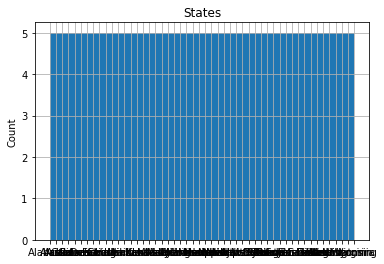

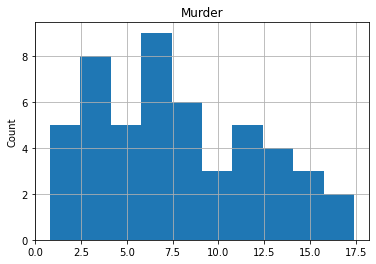

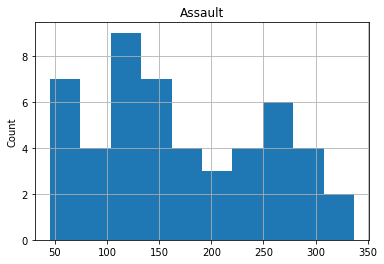

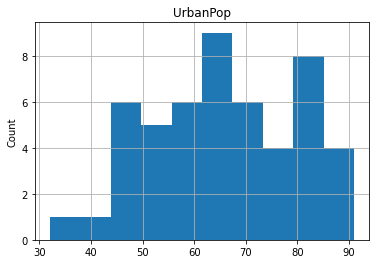

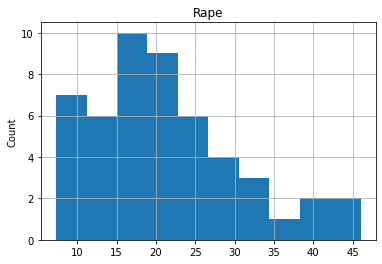

In [16]:
for feature in data.columns:
    data=data.copy()
    data[feature].hist(bins=10)
    plt.ylabel('Count')
    plt.title(feature)
    plt.show()

In [19]:

data.columns

Index(['States', 'Murder', 'Assault', 'UrbanPop', 'Rape'], dtype='object')

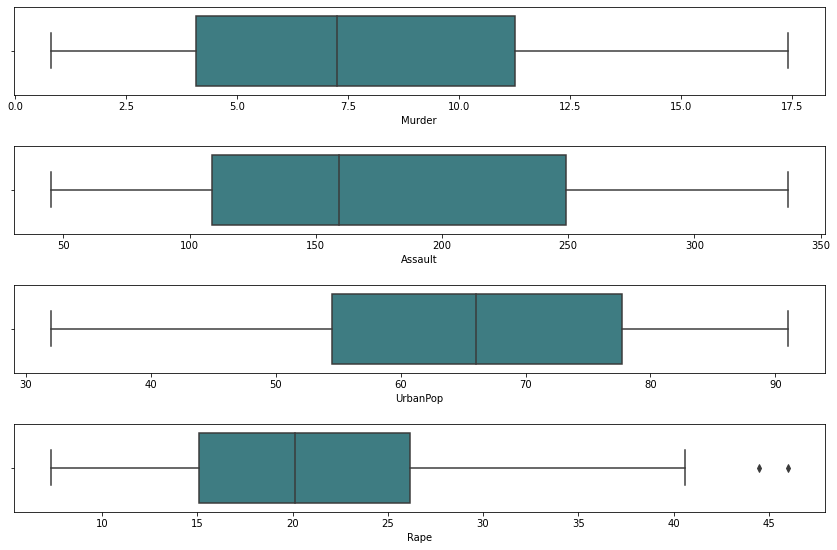

In [20]:
ot=data.copy() 
fig, axes=plt.subplots(4,1,figsize=(12,8),sharex=False,sharey=False)
sns.boxplot(x='Murder',data=ot,palette='crest',ax=axes[0])
sns.boxplot(x='Assault',data=ot,palette='crest',ax=axes[1])
sns.boxplot(x='UrbanPop',data=ot,palette='crest',ax=axes[2])
sns.boxplot(x='Rape',data=ot,palette='crest',ax=axes[3])
plt.tight_layout(pad=2.0)


<AxesSubplot:>

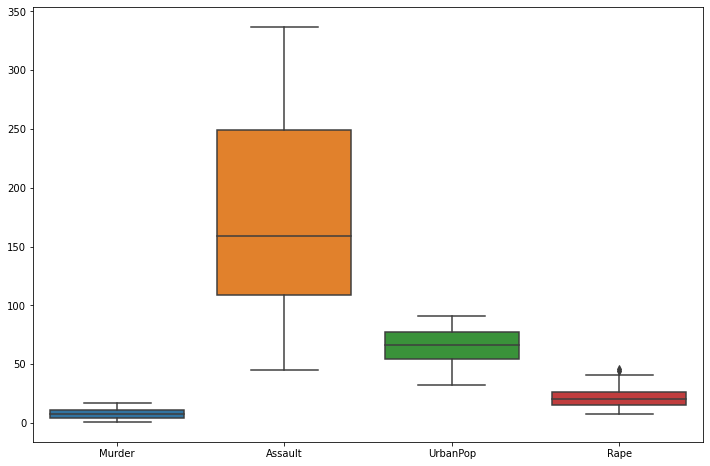

In [21]:
plt.figure(figsize=(12,8))
sns.boxplot(data=data)

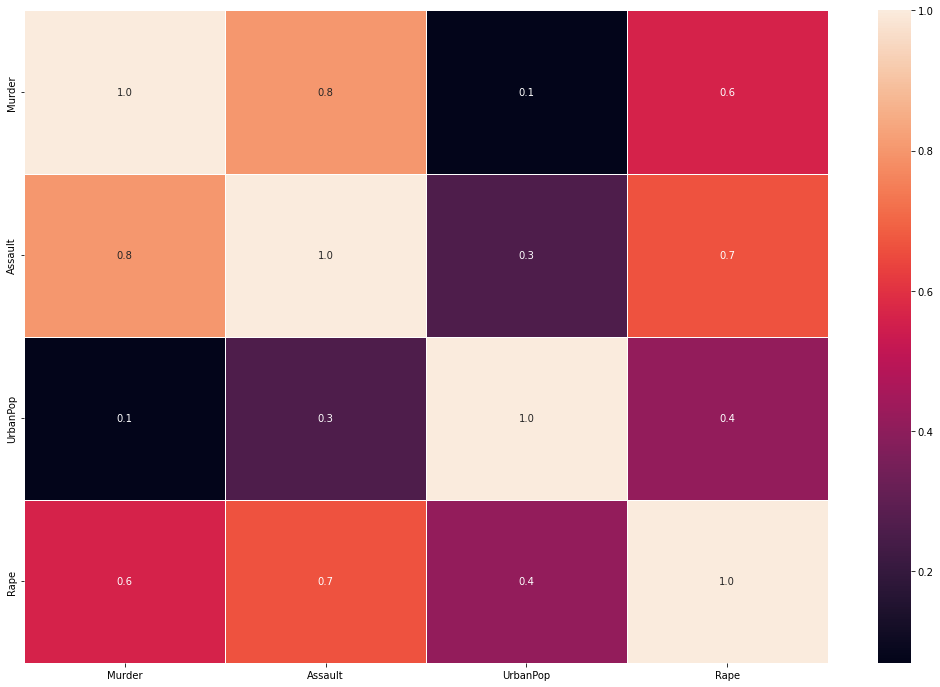

In [28]:
f,ax = plt.subplots(figsize=(18,12))
sns.heatmap(data.corr(), annot=True, linewidths =.5, fmt ='.1f',ax=ax)
plt.show()


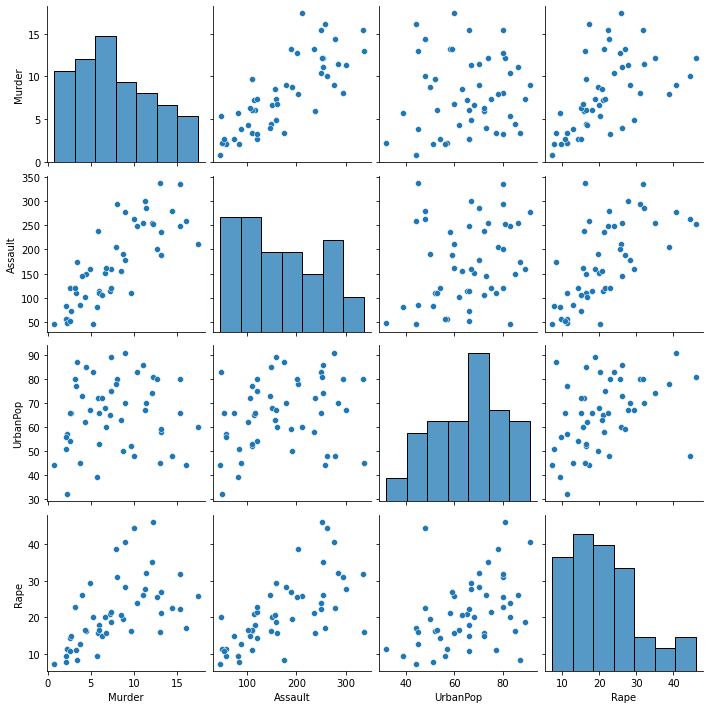

In [29]:
sns.pairplot(data)

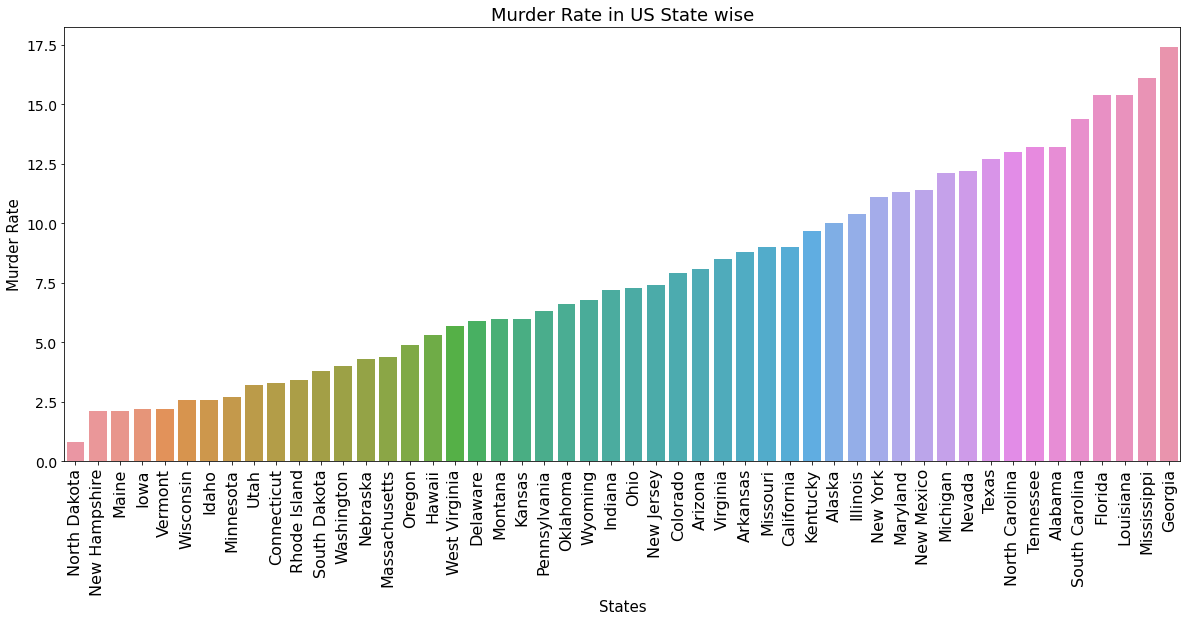

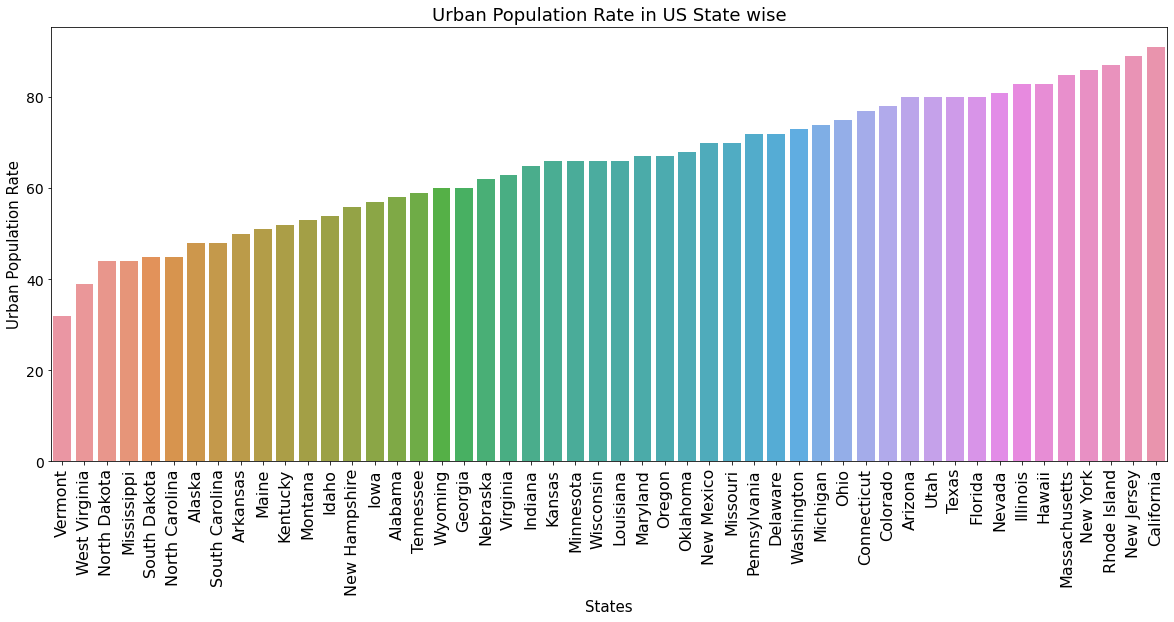

In [30]:
plt.figure(figsize=(20,8))
# make barplot and sort bars
sns.barplot(x='States',
            y="Murder", 
            data=data, 
            order=data.sort_values('Murder').States)
# set labels
plt.xlabel("States", size=15)
plt.ylabel("Murder Rate", size=15)
plt.yticks(rotation = 0, fontsize = 14)
plt.xticks(rotation = 90, fontsize = 16)
plt.title("Murder Rate in US State wise", size=18)
plt.show()

plt.figure(figsize=(20,8))
# make barplot and sort bars
sns.barplot(x='States',
            y="UrbanPop", 
            data=data, 
            order=data.sort_values('UrbanPop').States)
# set labels
plt.xlabel("States", size=15)
plt.ylabel("Urban Population Rate", size=15)
plt.yticks(rotation = 0, fontsize = 14)
plt.xticks(rotation = 90, fontsize = 16)
plt.title("Urban Population Rate in US State wise", size=18)
plt.show()


In [31]:
print('Top 10 States with Highest Murder Rate')
data.sort_values('Murder',ascending=False).head(10)

Top 10 States with Highest Murder Rate


,States,Murder,Assault,UrbanPop,Rape
9,Georgia,17.4,211,60,25.8
23,Mississippi,16.1,259,44,17.1
8,Florida,15.4,335,80,31.9
17,Louisiana,15.4,249,66,22.2
39,South Carolina,14.4,279,48,22.5
0,Alabama,13.2,236,58,21.2
41,Tennessee,13.2,188,59,26.9
32,North Carolina,13.0,337,45,16.1
42,Texas,12.7,201,80,25.5
27,Nevada,12.2,252,81,46.0


In [32]:
print('Top 10 States with Lowest Murder Rate')
data.sort_values('Murder',ascending=True).head(10)

Top 10 States with Lowest Murder Rate


,States,Murder,Assault,UrbanPop,Rape
33,North Dakota,0.8,45,44,7.3
28,New Hampshire,2.1,57,56,9.5
18,Maine,2.1,83,51,7.8
14,Iowa,2.2,56,57,11.3
44,Vermont,2.2,48,32,11.2
48,Wisconsin,2.6,53,66,10.8
11,Idaho,2.6,120,54,14.2
22,Minnesota,2.7,72,66,14.9
43,Utah,3.2,120,80,22.9
6,Connecticut,3.3,110,77,11.1


In [33]:
murder = data.sort_values('Murder', ascending = False, ignore_index=True)
murder.head()

,States,Murder,Assault,UrbanPop,Rape
0,Georgia,17.4,211,60,25.8
1,Mississippi,16.1,259,44,17.1
2,Florida,15.4,335,80,31.9
3,Louisiana,15.4,249,66,22.2
4,South Carolina,14.4,279,48,22.5


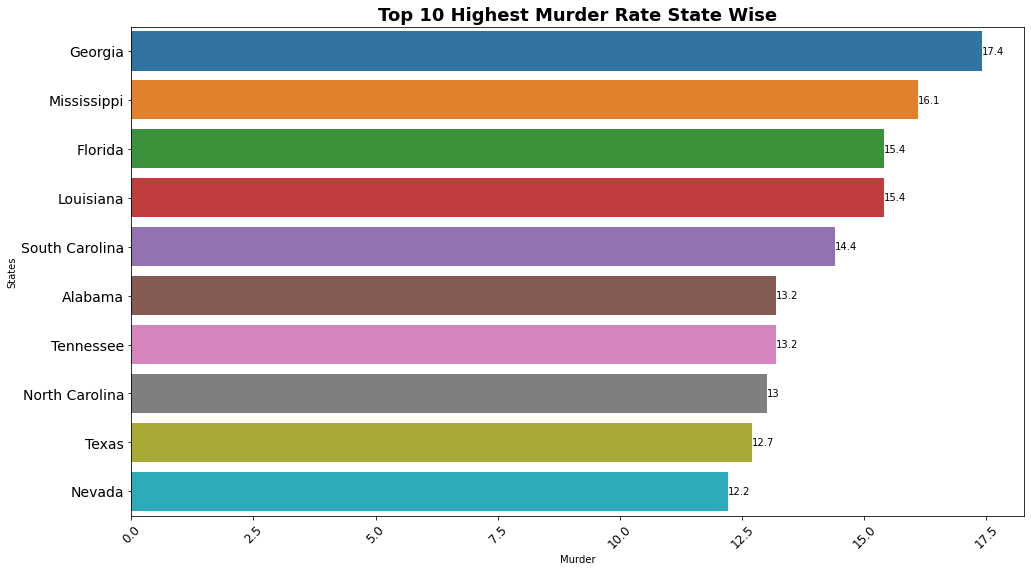

In [34]:
plt.figure(figsize = (16,9))
ax = sns.barplot(x = murder.Murder[:10], y = murder.States[:10])
plt.yticks(rotation = 0, fontsize = 14)
plt.xticks(rotation = 45, fontsize = 12)
plt.title('Top 10 Highest Murder Rate State Wise',  fontsize = 18, fontweight = 'bold')
for i in ax.containers:
    ax.bar_label(i,)

In [35]:
murder = data.sort_values('Murder', ascending = True,ignore_index=True)
murder.head()

,States,Murder,Assault,UrbanPop,Rape
0,North Dakota,0.8,45,44,7.3
1,New Hampshire,2.1,57,56,9.5
2,Maine,2.1,83,51,7.8
3,Iowa,2.2,56,57,11.3
4,Vermont,2.2,48,32,11.2


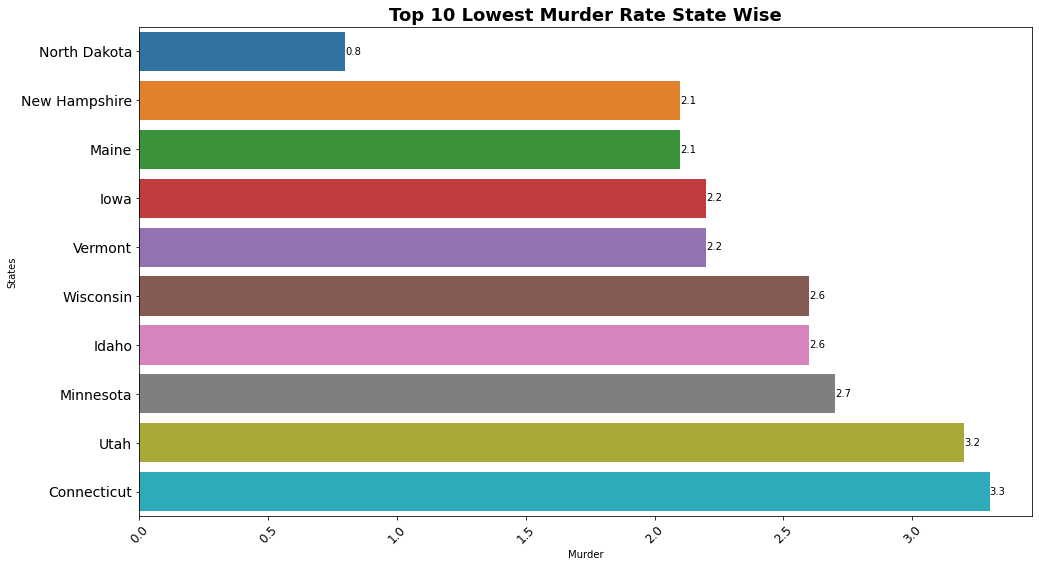

In [36]:
plt.figure(figsize = (16,9))
ax = sns.barplot(x = murder.Murder[:10], y = murder.States[:10])
plt.yticks(rotation = 0, fontsize = 14)
plt.xticks(rotation = 45, fontsize = 12)
plt.title('Top 10 Lowest Murder Rate State Wise',  fontsize = 18, fontweight = 'bold')
for i in ax.containers:
    ax.bar_label(i,)

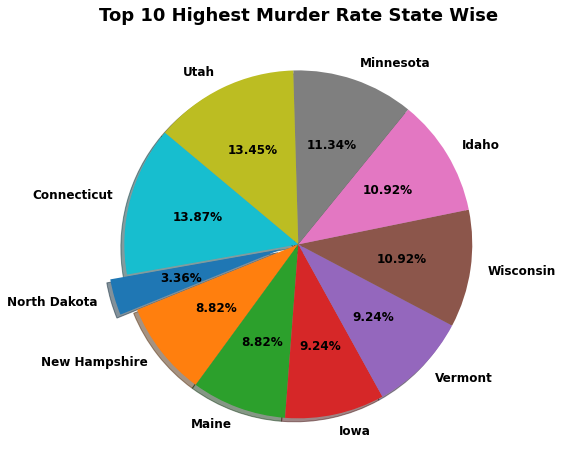

In [37]:
plt.figure(figsize = (8,8))
plt.pie(murder.Murder[:10],
       labels=murder.States[:10],
       explode = [0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0],
       autopct= '%.2f%%',
       shadow= True,
       startangle= 190,
       textprops = {'size':'large',
                   'fontweight':'bold',
                    'rotation':'0',
                   'color':'black'})
#plt.legend(loc= 'best')
plt.title("Top 10 Highest Murder Rate State Wise", fontsize = 18, fontweight = 'bold')
plt.show()

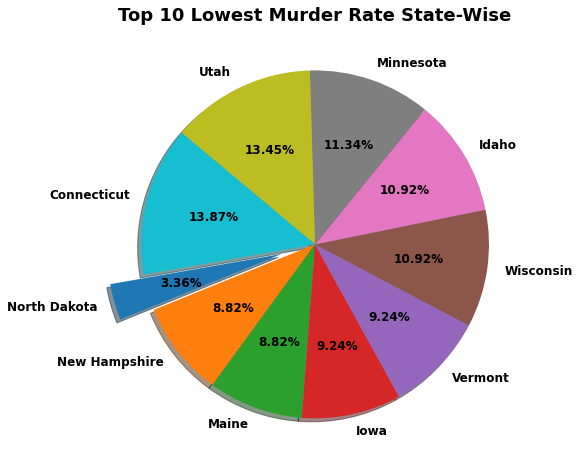

In [38]:
plt.figure(figsize = (8,8))
plt.pie(murder.Murder[:10],
       labels=murder.States[:10],
       explode = [0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0],
       autopct= '%.2f%%',
       shadow= True,
       startangle= 190,
       textprops = {'size':'large',
                   'fontweight':'bold',
                    'rotation':'0',
                   'color':'black'})
#plt.legend(loc= 'best')
plt.title("Top 10 Lowest Murder Rate State-Wise", fontsize = 18, fontweight = 'bold')
plt.show()

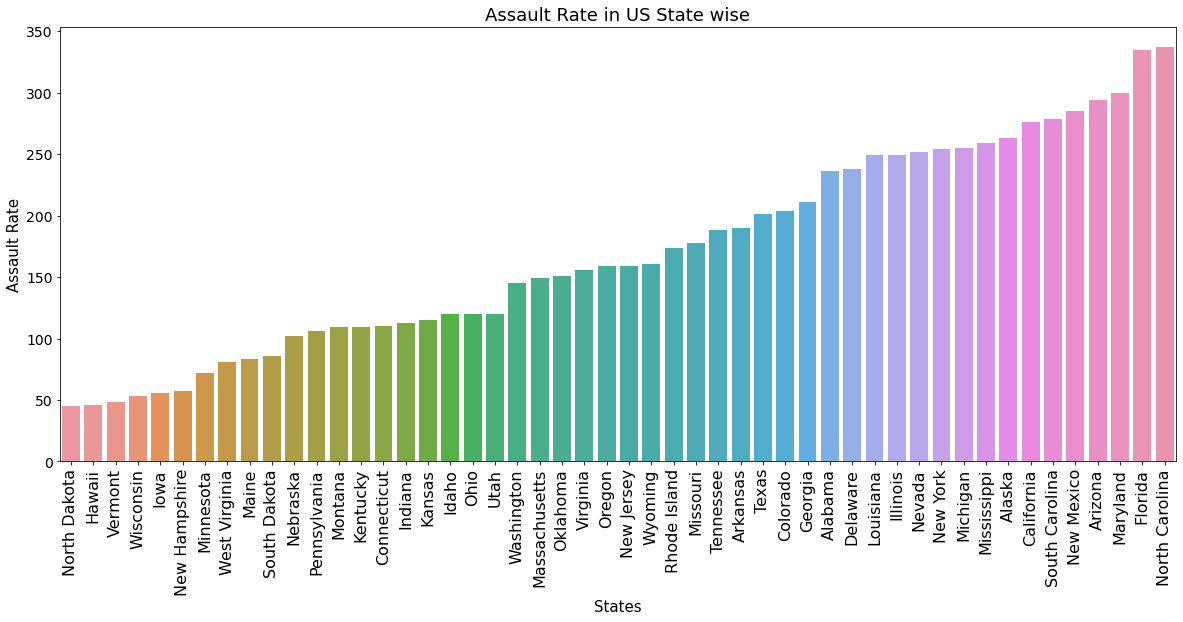

In [39]:
plt.figure(figsize=(20,8))
sns.barplot(x='States',
            y="Assault", 
            data=data, 
            order=data.sort_values('Assault').States)
# set labels
plt.xlabel("States", size=15)
plt.ylabel("Assault Rate", size=15)
plt.yticks(rotation = 0, fontsize = 14)
plt.xticks(rotation = 90, fontsize = 16)
plt.title("Assault Rate in US State wise", size=18)
plt.show()

In [40]:
print('Top 10 States with Highest Assault Rate')
data.sort_values('Assault',ascending=False, ignore_index=True).head(10)

Top 10 States with Highest Assault Rate


,States,Murder,Assault,UrbanPop,Rape
0,North Carolina,13.0,337,45,16.1
1,Florida,15.4,335,80,31.9
2,Maryland,11.3,300,67,27.8
3,Arizona,8.1,294,80,31.0
4,New Mexico,11.4,285,70,32.1
5,South Carolina,14.4,279,48,22.5
6,California,9.0,276,91,40.6
7,Alaska,10.0,263,48,44.5
8,Mississippi,16.1,259,44,17.1
9,Michigan,12.1,255,74,35.1


In [41]:
print('Top 10 States with Lowest Assault Rate')
data.sort_values('Assault',ascending=True, ignore_index=True).head(10)

Top 10 States with Lowest Assault Rate


,States,Murder,Assault,UrbanPop,Rape
0,North Dakota,0.8,45,44,7.3
1,Hawaii,5.3,46,83,20.2
2,Vermont,2.2,48,32,11.2
3,Wisconsin,2.6,53,66,10.8
4,Iowa,2.2,56,57,11.3
5,New Hampshire,2.1,57,56,9.5
6,Minnesota,2.7,72,66,14.9
7,West Virginia,5.7,81,39,9.3
8,Maine,2.1,83,51,7.8
9,South Dakota,3.8,86,45,12.8


In [42]:
Assault = data.sort_values('Assault', ascending = False)

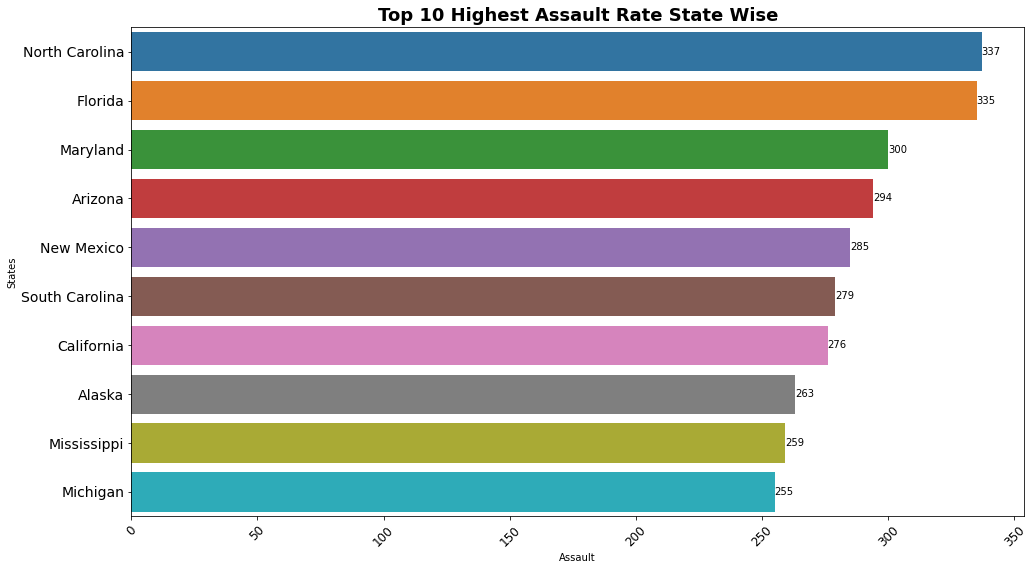

In [43]:
plt.figure(figsize = (16,9))
ax = sns.barplot(x = Assault.Assault[:10], y = Assault.States[:10])
plt.yticks(rotation = 0, fontsize = 14)
plt.xticks(rotation = 45, fontsize = 12)
plt.title('Top 10 Highest Assault Rate State Wise',  fontsize = 18, fontweight = 'bold')
for i in ax.containers:
    ax.bar_label(i,)

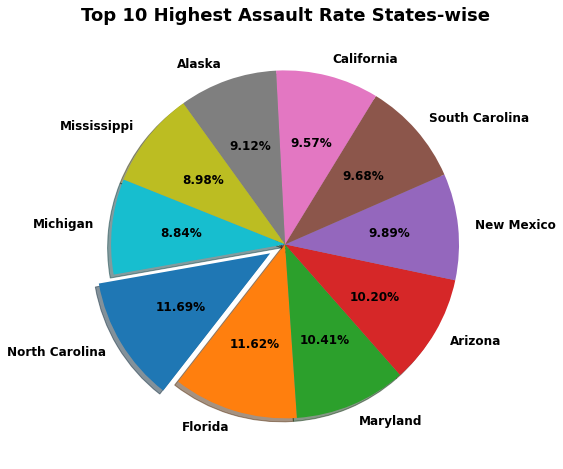

In [44]:
plt.figure(figsize = (8,8))
plt.pie(Assault.Assault[:10],
       labels=Assault.States[:10],
       explode = [0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0],
       autopct= '%.2f%%',
       shadow= True,
       startangle= 190,
       textprops = {'size':'large',
                   'fontweight':'bold',
                    'rotation':'0',
                   'color':'black'})
#plt.legend(loc= 'best')
plt.title("Top 10 Highest Assault Rate States-wise", fontsize = 18, fontweight = 'bold')
plt.show()

In [45]:
assault = data.sort_values('Assault', ascending = True)

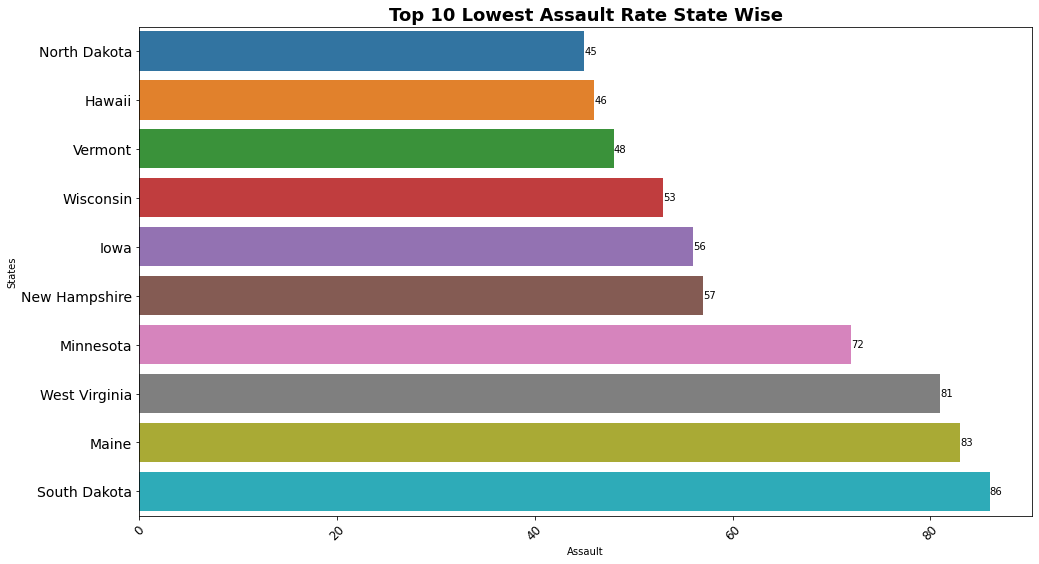

In [46]:
plt.figure(figsize = (16,9))
ax = sns.barplot(x = assault.Assault[:10], y = assault.States[:10])
plt.yticks(rotation = 0, fontsize = 14)
plt.xticks(rotation = 45, fontsize = 12)
plt.title('Top 10 Lowest Assault Rate State Wise',  fontsize = 18, fontweight = 'bold')
for i in ax.containers:
    ax.bar_label(i,)

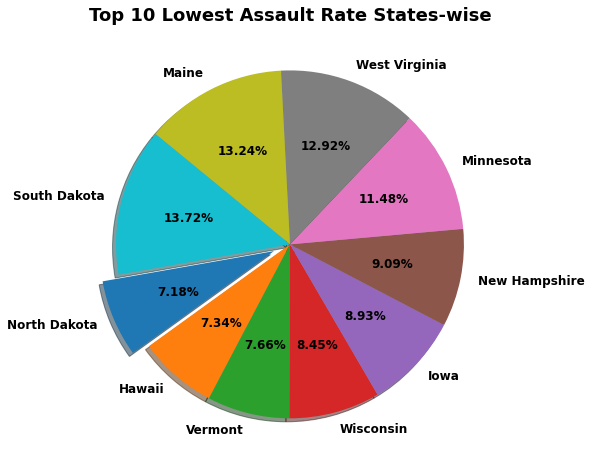

In [47]:
plt.figure(figsize = (8,8))
plt.pie(assault.Assault[:10],
       labels=assault.States[:10],
       explode = [0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0],
       autopct= '%.2f%%',
       shadow= True,
       startangle= 190,
       textprops = {'size':'large',
                   'fontweight':'bold',
                    'rotation':'0',
                   'color':'black'})
#plt.legend(loc= 'best')
plt.title("Top 10 Lowest Assault Rate States-wise", fontsize = 18, fontweight = 'bold')
plt.show()

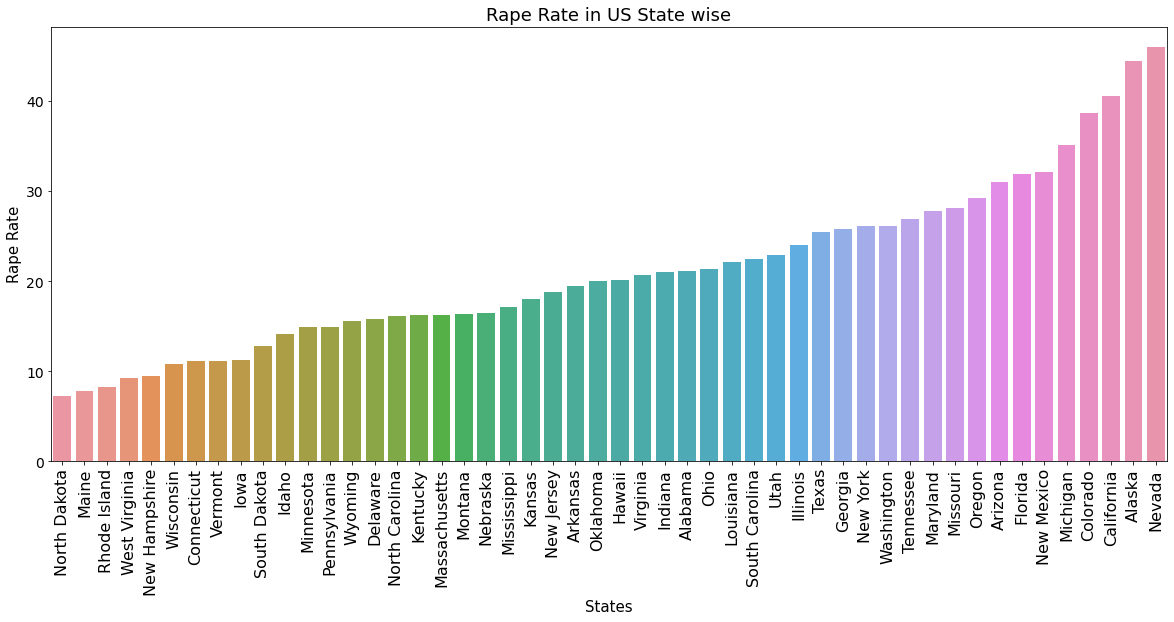

In [48]:
plt.figure(figsize=(20,8))
# make barplot and sort bars
sns.barplot(x='States',
            y="Rape", 
            data=data, 
            order=data.sort_values('Rape').States)
# set labels
plt.xlabel("States", size=15)
plt.ylabel("Rape Rate", size=15)
plt.yticks(rotation = 0, fontsize = 14)
plt.xticks(rotation = 90, fontsize = 16)
plt.title("Rape Rate in US State wise", size=18)
plt.show()

In [49]:
print('Top 10 States with Highest Rape Rate')
data.sort_values('Rape',ascending=False, ignore_index=True).head(10)

Top 10 States with Highest Rape Rate


,States,Murder,Assault,UrbanPop,Rape
0,Nevada,12.2,252,81,46.0
1,Alaska,10.0,263,48,44.5
2,California,9.0,276,91,40.6
3,Colorado,7.9,204,78,38.7
4,Michigan,12.1,255,74,35.1
5,New Mexico,11.4,285,70,32.1
6,Florida,15.4,335,80,31.9
7,Arizona,8.1,294,80,31.0
8,Oregon,4.9,159,67,29.3
9,Missouri,9.0,178,70,28.2


In [50]:
print('Top 10 States with Lowest Rape Rate')
data.sort_values('Rape',ascending=True, ignore_index=True).head(10)

Top 10 States with Lowest Rape Rate


,States,Murder,Assault,UrbanPop,Rape
0,North Dakota,0.8,45,44,7.3
1,Maine,2.1,83,51,7.8
2,Rhode Island,3.4,174,87,8.3
3,West Virginia,5.7,81,39,9.3
4,New Hampshire,2.1,57,56,9.5
5,Wisconsin,2.6,53,66,10.8
6,Connecticut,3.3,110,77,11.1
7,Vermont,2.2,48,32,11.2
8,Iowa,2.2,56,57,11.3
9,South Dakota,3.8,86,45,12.8


In [54]:
rape = data.sort_values('Rape', ascending = True)

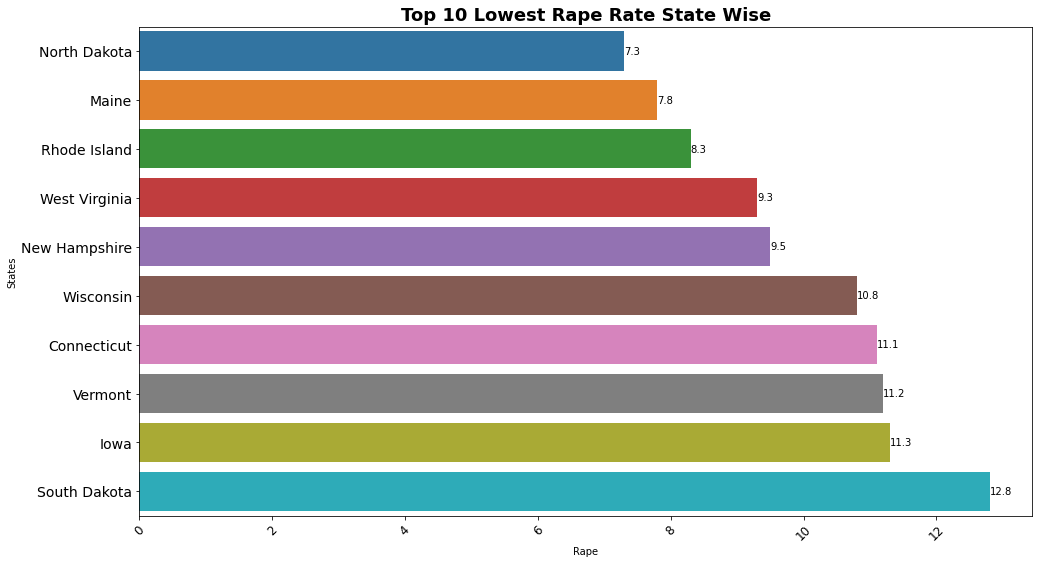

In [55]:
plt.figure(figsize = (16,9))
ax = sns.barplot(x = rape.Rape[:10], y = rape.States[:10])
plt.yticks(rotation = 0, fontsize = 14)
plt.xticks(rotation = 45, fontsize = 12)
plt.title('Top 10 Lowest Rape Rate State Wise',  fontsize = 18, fontweight = 'bold')
for i in ax.containers:
    ax.bar_label(i,)

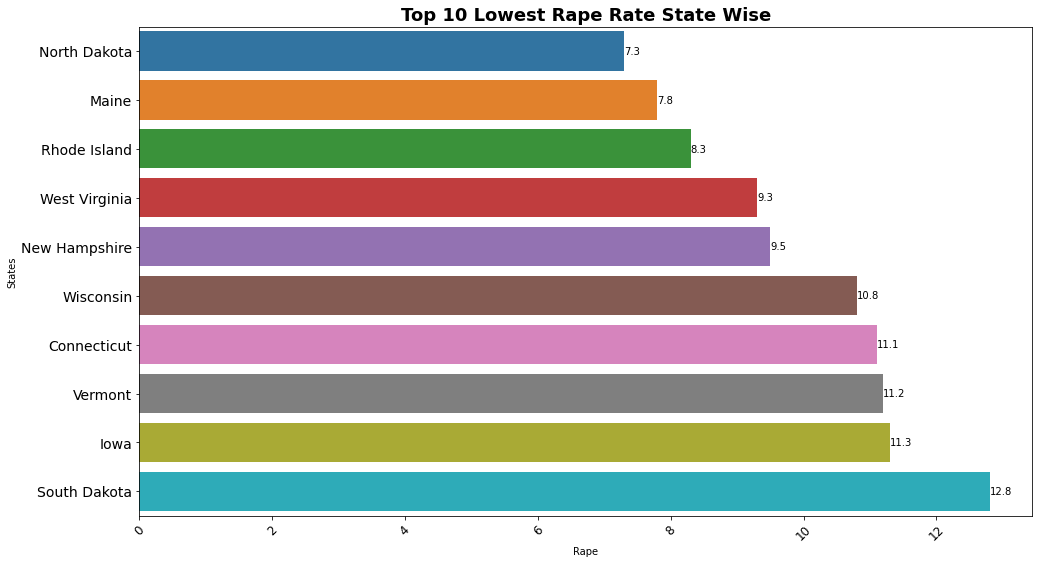

In [56]:
plt.figure(figsize = (16,9))
ax = sns.barplot(x = rape.Rape[:10], y = rape.States[:10])
plt.yticks(rotation = 0, fontsize = 14)
plt.xticks(rotation = 45, fontsize = 12)
plt.title('Top 10 Lowest Rape Rate State Wise',  fontsize = 18, fontweight = 'bold')
for i in ax.containers:
    ax.bar_label(i,)

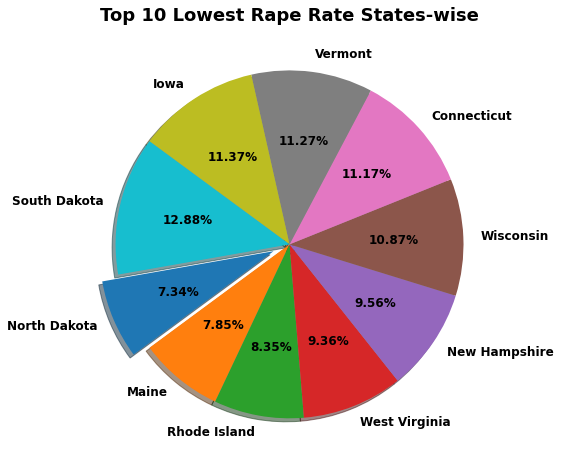

In [57]:
plt.figure(figsize = (8,8))
plt.pie(rape.Rape[:10],
       labels=rape.States[:10],
       explode = [0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0],
       autopct= '%.2f%%',
       shadow= True,
       startangle= 190,
       textprops = {'size':'large',
                   'fontweight':'bold',
                    'rotation':'0',
                   'color':'black'})
#plt.legend(loc= 'best')
plt.title("Top 10 Lowest Rape Rate States-wise", fontsize = 18, fontweight = 'bold')
plt.show()

In [59]:
data.columns

Index(['States', 'Murder', 'Assault', 'UrbanPop', 'Rape'], dtype='object')

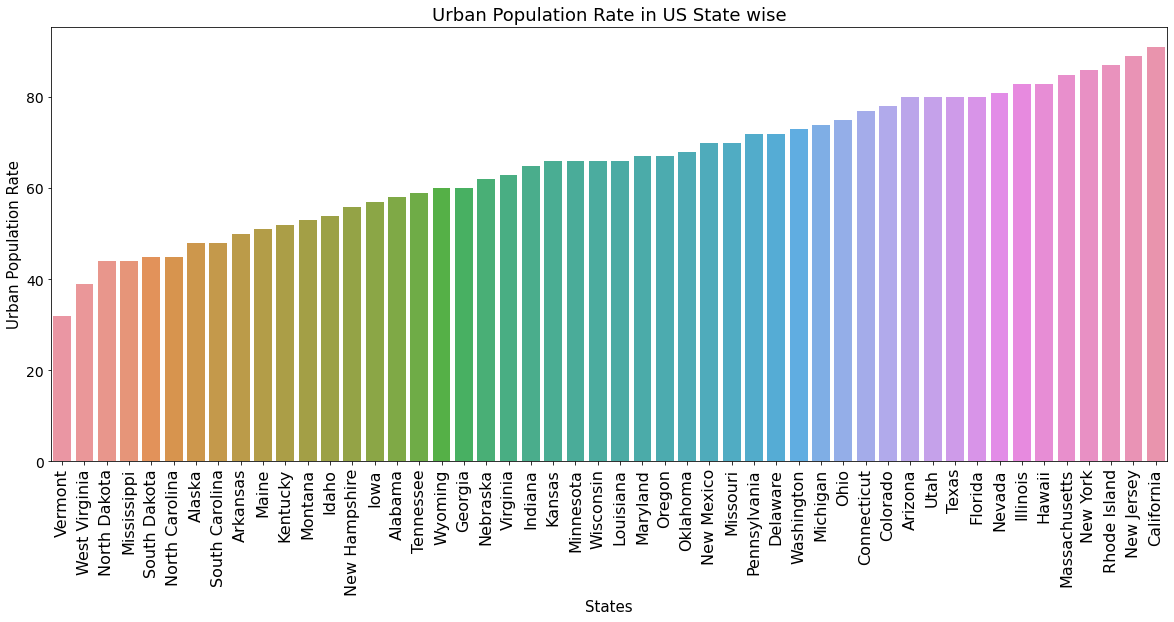

In [60]:
plt.figure(figsize=(20,8))
# make barplot and sort bars
sns.barplot(x='States',
            y="UrbanPop", 
            data=data, 
            order=data.sort_values('UrbanPop').States)
# set labels
plt.xlabel("States", size=15)
plt.ylabel("Urban Population Rate", size=15)
plt.yticks(rotation = 0, fontsize = 14)
plt.xticks(rotation = 90, fontsize = 16)
plt.title("Urban Population Rate in US State wise", size=18)
plt.show()

In [61]:
print('Top 10 States with Highest Urban Population Rate')
data.sort_values('UrbanPop',ascending=False, ignore_index=True).head(10)

Top 10 States with Highest Urban Population Rate


,States,Murder,Assault,UrbanPop,Rape
0,California,9.0,276,91,40.6
1,New Jersey,7.4,159,89,18.8
2,Rhode Island,3.4,174,87,8.3
3,New York,11.1,254,86,26.1
4,Massachusetts,4.4,149,85,16.3
5,Hawaii,5.3,46,83,20.2
6,Illinois,10.4,249,83,24.0
7,Nevada,12.2,252,81,46.0
8,Texas,12.7,201,80,25.5
9,Arizona,8.1,294,80,31.0


In [62]:
print('Top 10 States with Lowest Urban Population Rate')
data.sort_values('UrbanPop',ascending=True, ignore_index=True).head(10)

Top 10 States with Lowest Urban Population Rate


,States,Murder,Assault,UrbanPop,Rape
0,Vermont,2.2,48,32,11.2
1,West Virginia,5.7,81,39,9.3
2,North Dakota,0.8,45,44,7.3
3,Mississippi,16.1,259,44,17.1
4,South Dakota,3.8,86,45,12.8
5,North Carolina,13.0,337,45,16.1
6,Alaska,10.0,263,48,44.5
7,South Carolina,14.4,279,48,22.5
8,Arkansas,8.8,190,50,19.5
9,Maine,2.1,83,51,7.8


In [63]:
urbanpop = data.sort_values('UrbanPop', ascending = False)

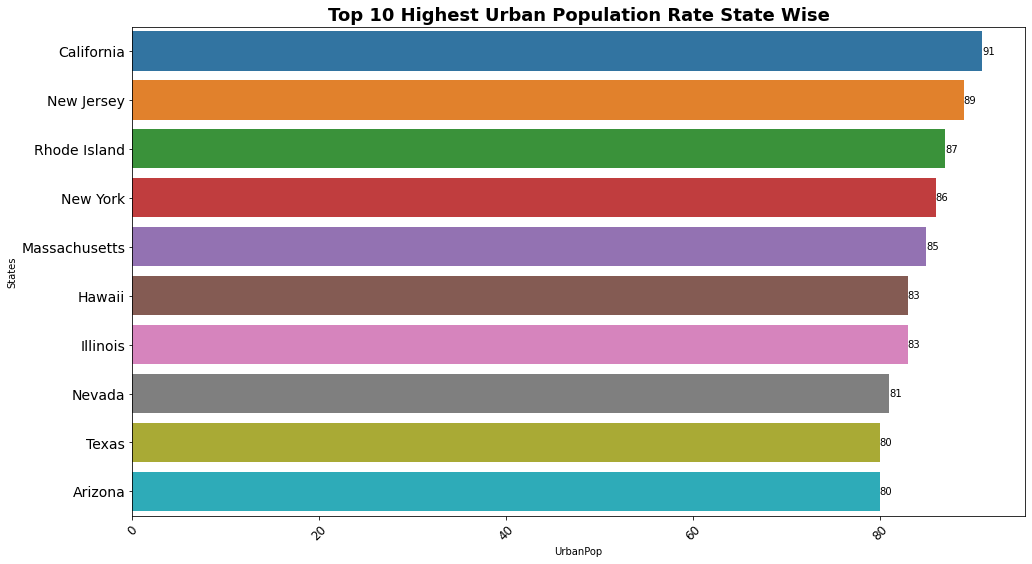

In [64]:
plt.figure(figsize = (16,9))
ax = sns.barplot(x = urbanpop.UrbanPop[:10], y = urbanpop.States[:10])
plt.yticks(rotation = 0, fontsize = 14)
plt.xticks(rotation = 45, fontsize = 12)
plt.title('Top 10 Highest Urban Population Rate State Wise',  fontsize = 18, fontweight = 'bold')
for i in ax.containers:
    ax.bar_label(i,)

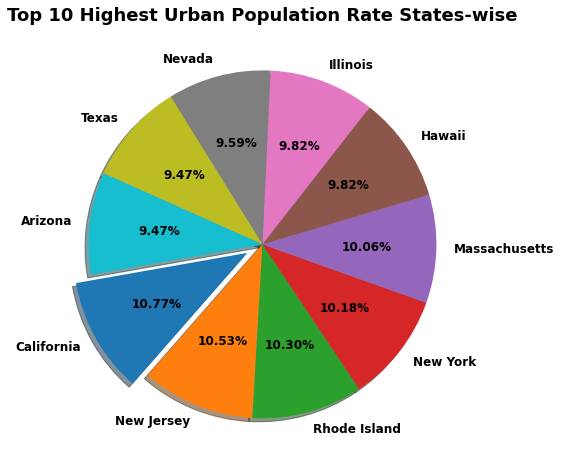

In [65]:
plt.figure(figsize = (8,8))
plt.pie(urbanpop.UrbanPop[:10],
       labels=urbanpop.States[:10],
       explode = [0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0],
       autopct= '%.2f%%',
       shadow= True,
       startangle= 190,
       textprops = {'size':'large',
                   'fontweight':'bold',
                    'rotation':'0',
                   'color':'black'})
#plt.legend(loc= 'best')
plt.title("Top 10 Highest Urban Population Rate States-wise", fontsize = 18, fontweight = 'bold')
plt.show()

In [66]:
UrbanPop = data.sort_values('UrbanPop', ascending = True)

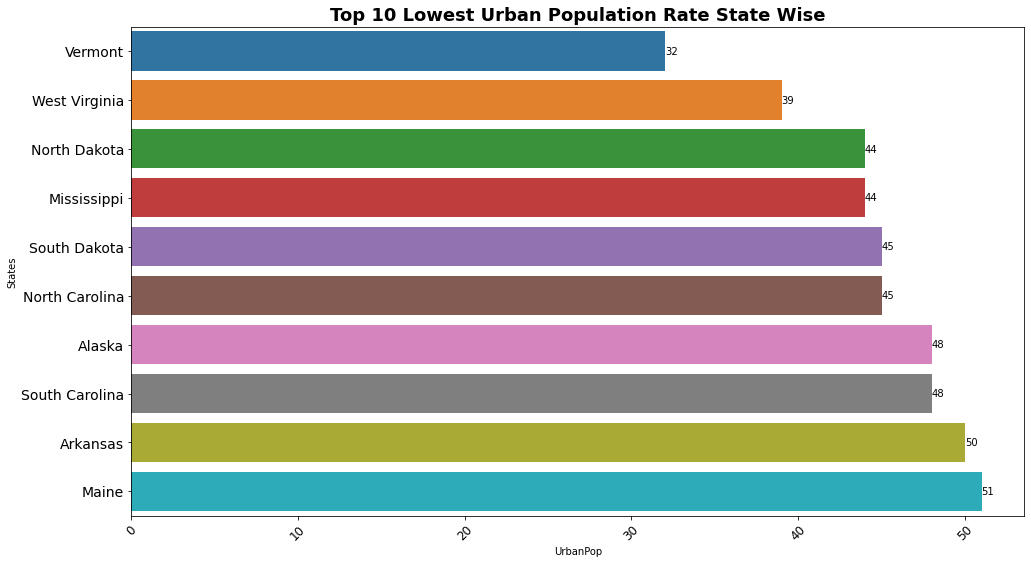

In [67]:
plt.figure(figsize = (16,9))
ax = sns.barplot(x = UrbanPop.UrbanPop[:10], y = UrbanPop.States[:10])
plt.yticks(rotation = 0, fontsize = 14)
plt.xticks(rotation = 45, fontsize = 12)
plt.title('Top 10 Lowest Urban Population Rate State Wise',  fontsize = 18, fontweight = 'bold')
for i in ax.containers:
    ax.bar_label(i,)

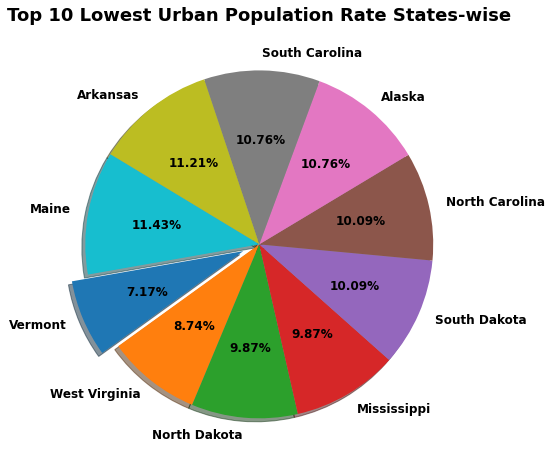

In [68]:
plt.figure(figsize = (8,8))
plt.pie(UrbanPop.UrbanPop[:10],
       labels=UrbanPop.States[:10],
       explode = [0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0],
       autopct= '%.2f%%',
       shadow= True,
       startangle= 190,
       textprops = {'size':'large',
                   'fontweight':'bold',
                    'rotation':'0',
                   'color':'black'})
#plt.legend(loc= 'best')
plt.title("Top 10 Lowest Urban Population Rate States-wise", fontsize = 18, fontweight = 'bold')
plt.show()

In [69]:
df = data.set_index('States')
df.head()

,Murder,Assault,UrbanPop,Rape
States,,,,
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


In [70]:
standard_scaler = StandardScaler()
std_df = standard_scaler.fit_transform(df)
std_df.shape

(50, 4)

In [71]:
from sklearn.preprocessing import MinMaxScaler
minmax = MinMaxScaler()

minmax_df = minmax.fit_transform(df)
minmax_df.shape

(50, 4)

In [72]:
cluster_range = range(1,15)
cluster_errors = []
for num_clusters in cluster_range:
    clusters = KMeans(num_clusters,n_init=10)
    clusters.fit(std_df)
    labels = clusters.labels_
    centroids = clusters.cluster_centers_
    cluster_errors.append(clusters.inertia_)
clusters_df = pd.DataFrame({"num_clusters":cluster_range,"cluster_errors":cluster_errors})
clusters_df

,num_clusters,cluster_errors
0,1,200.000000
1,2,104.961633
2,3,79.921703
3,4,57.554259
4,5,49.945946
5,6,43.984486
6,7,40.005824
7,8,35.578516
8,9,31.848688
9,10,28.773251


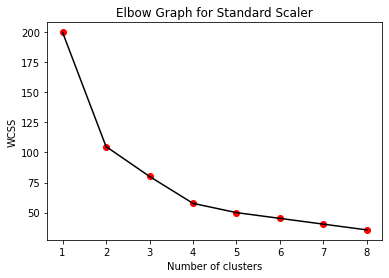

In [73]:
wcss=[]
for i in range(1,9):
    kmeans=KMeans(n_clusters=i,random_state=2)
    kmeans.fit(std_df)
    wcss.append(kmeans.inertia_)
    
# Plot K values range vs WCSS to get Elbow graph for choosing K (no. of clusters)
plt.plot(range(1,9),wcss,color = 'black')
plt.scatter(range(1,9),wcss,color='red')
plt.title('Elbow Graph for Standard Scaler')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

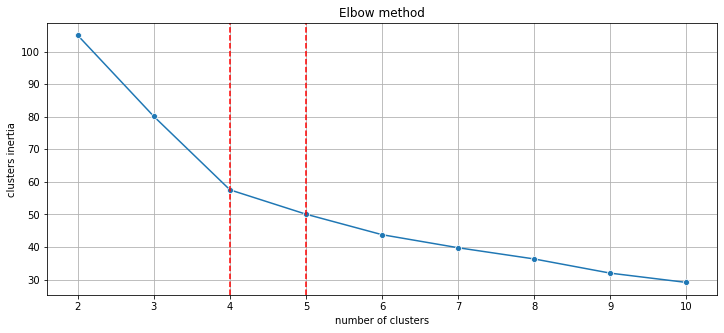

In [74]:
from sklearn.metrics import silhouette_score
n_clusters = [2,3,4,5,6,7,8,9,10] # number of clusters
clusters_inertia = [] # inertia of clusters
s_scores = [] # silhouette scores

for n in n_clusters:
    KM_est = KMeans(n_clusters=n, init='k-means++').fit(std_df)
    clusters_inertia.append(KM_est.inertia_)    # data for the elbow method
    silhouette_avg = silhouette_score(std_df, KM_est.labels_)
    s_scores.append(silhouette_avg) # data for the silhouette score method

fig, ax = plt.subplots(figsize=(12,5))
ax = sns.lineplot(n_clusters, clusters_inertia, marker='o', ax=ax)
ax.set_title("Elbow method")
ax.set_xlabel("number of clusters")
ax.set_ylabel("clusters inertia")
ax.axvline(4, ls="--", c="red")
ax.axvline(5, ls="--", c="red")
plt.grid()
plt.show()

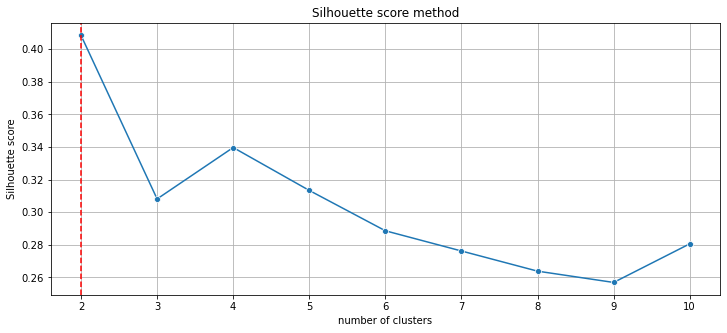

In [76]:
fig, ax = plt.subplots(figsize=(12,5))
ax = sns.lineplot(n_clusters, s_scores, marker='o', ax=ax)
ax.set_title("Silhouette score method")
ax.set_xlabel("number of clusters")
ax.set_ylabel("Silhouette score")
ax.axvline(2, ls="--", c="red")
plt.grid()
plt.show()

In [77]:
clust_list = [2,3,4,5,6,7,8,9]
#  Silhouette score for stadardScaler applied on data.
for n_clusters in clust_list:
    clusterer1 = KMeans(n_clusters=n_clusters, random_state=0)
    cluster_labels1 = clusterer1.fit_predict(std_df)
    sil_score1= sil(std_df, cluster_labels1)
    print("For n_clusters =", n_clusters,"The average silhouette_score is :", sil_score1)

For n_clusters = 2 The average silhouette_score is : 0.4084890326217641
For n_clusters = 3 The average silhouette_score is : 0.3095091512791688
For n_clusters = 4 The average silhouette_score is : 0.33968891433344395
For n_clusters = 5 The average silhouette_score is : 0.30612803169146263
For n_clusters = 6 The average silhouette_score is : 0.29910456843899946
For n_clusters = 7 The average silhouette_score is : 0.23035904501364113
For n_clusters = 8 The average silhouette_score is : 0.2732934287338534
For n_clusters = 9 The average silhouette_score is : 0.2518939934580804


For n_clusters = 2 The average silhouette_score is : 0.4084890326217641
For n_clusters = 3 The average silhouette_score is : 0.3095091512791688
For n_clusters = 4 The average silhouette_score is : 0.33968891433344395
For n_clusters = 5 The average silhouette_score is : 0.30612803169146263
For n_clusters = 6 The average silhouette_score is : 0.29910456843899946
For n_clusters = 7 The average silhouette_score is : 0.23035904501364113
For n_clusters = 8 The average silhouette_score is : 0.2732934287338534
For n_clusters = 9 The average silhouette_score is : 0.2518939934580804
For n_clusters = 2 The average silhouette_score is : 0.4084890326217641
For n_clusters = 3 The average silhouette_score is : 0.3095091512791688
For n_clusters = 4 The average silhouette_score is : 0.33968891433344395
For n_clusters = 5 The average silhouette_score is : 0.30612803169146263
For n_clusters = 6 The average silhouette_score is : 0.29910456843899946
For n_clusters = 7 The average silhouette_score is : 0.23

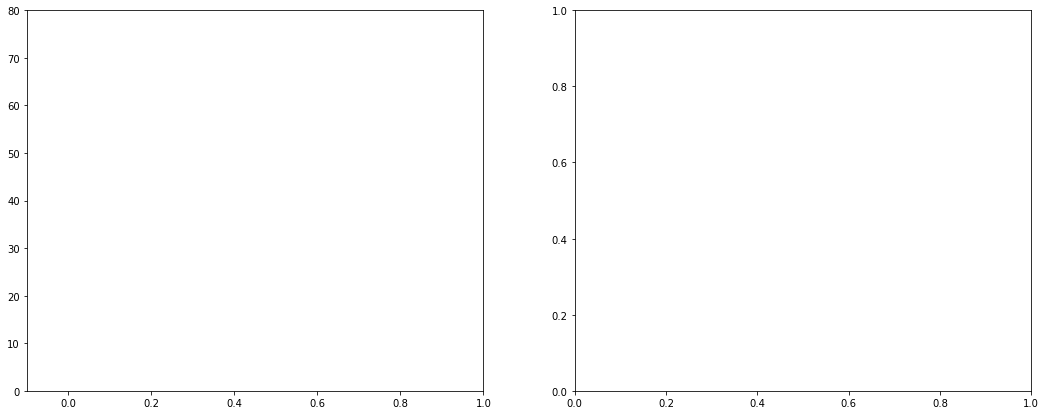

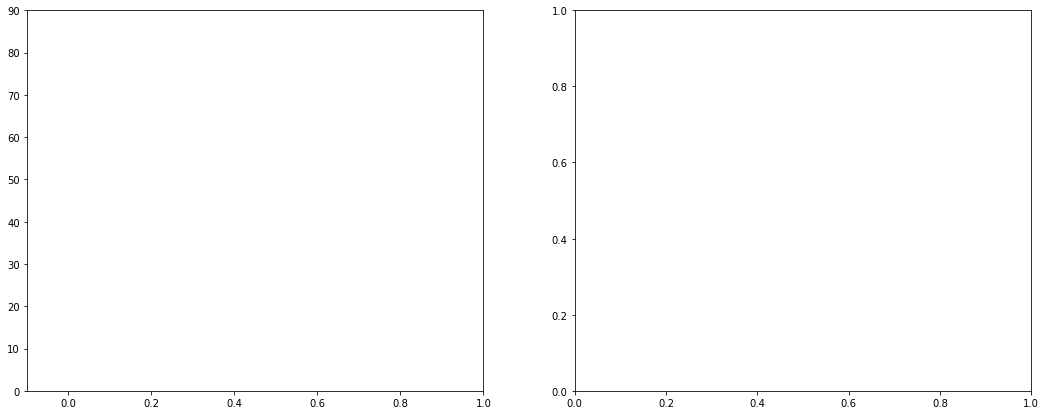

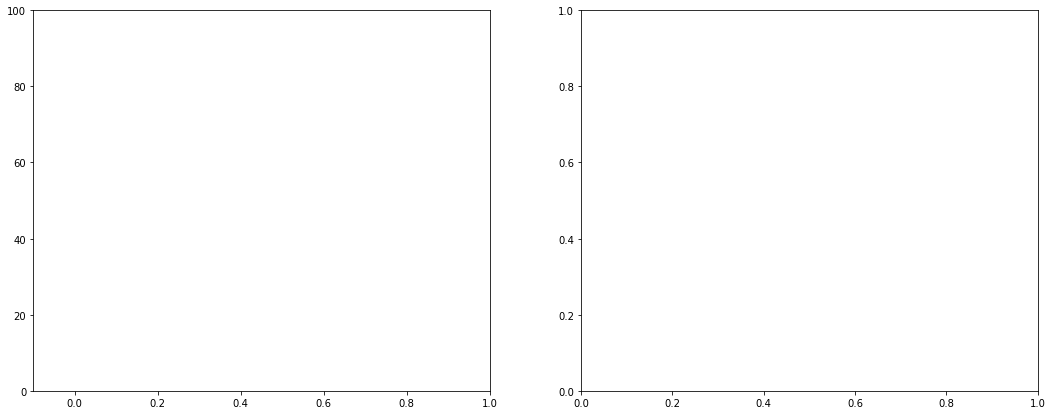

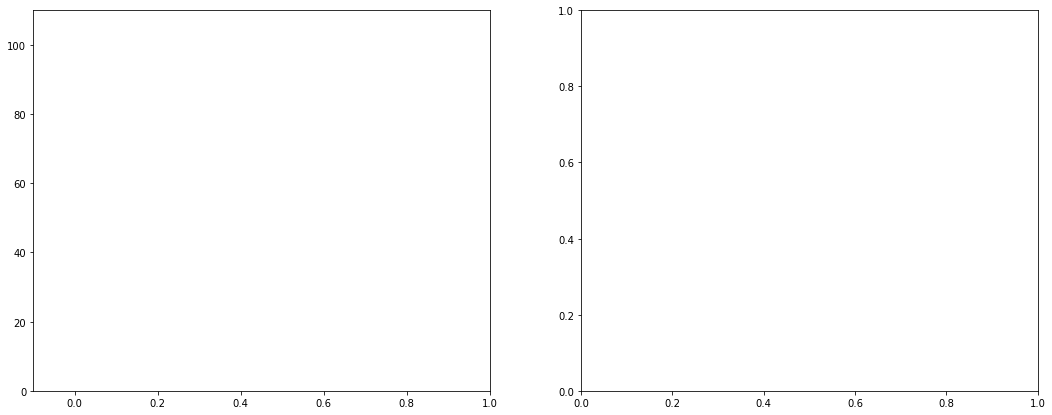

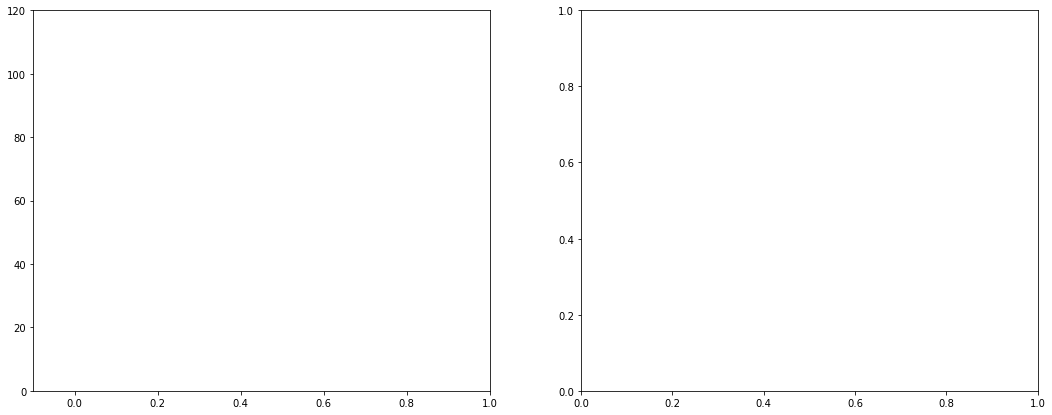

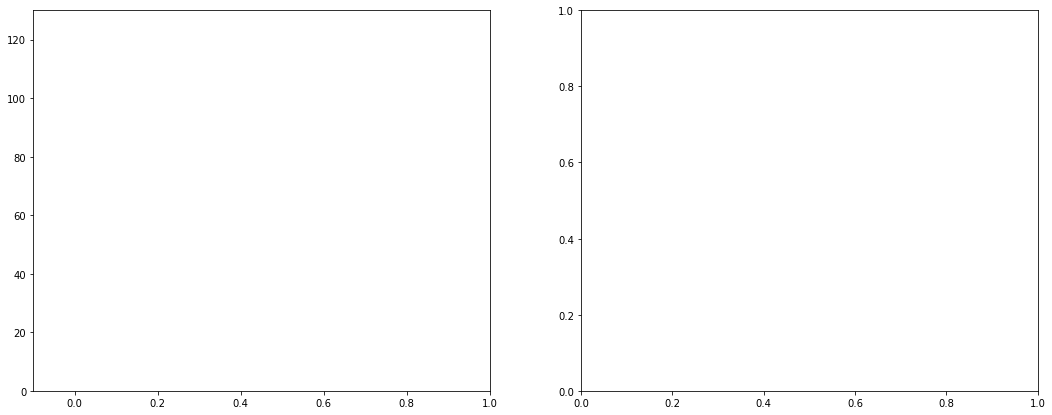

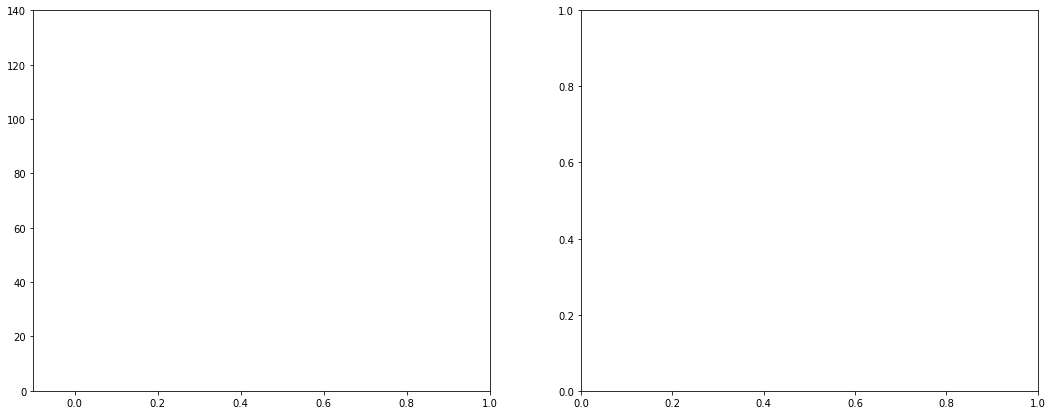

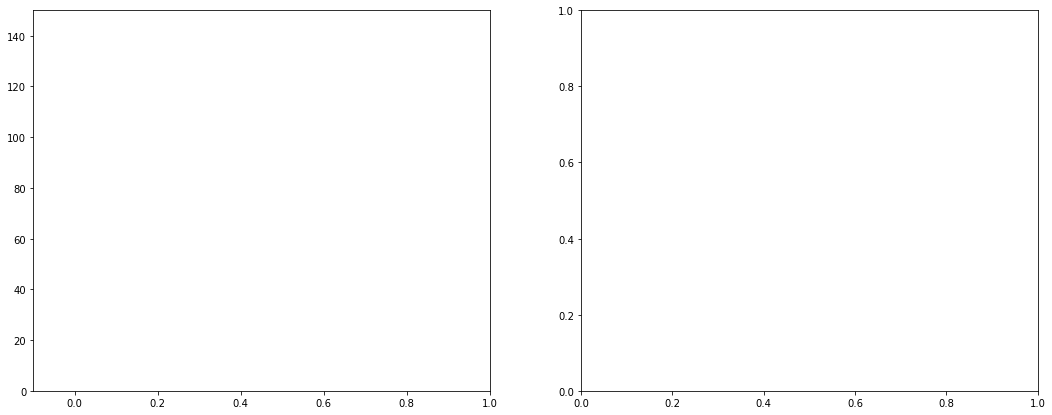

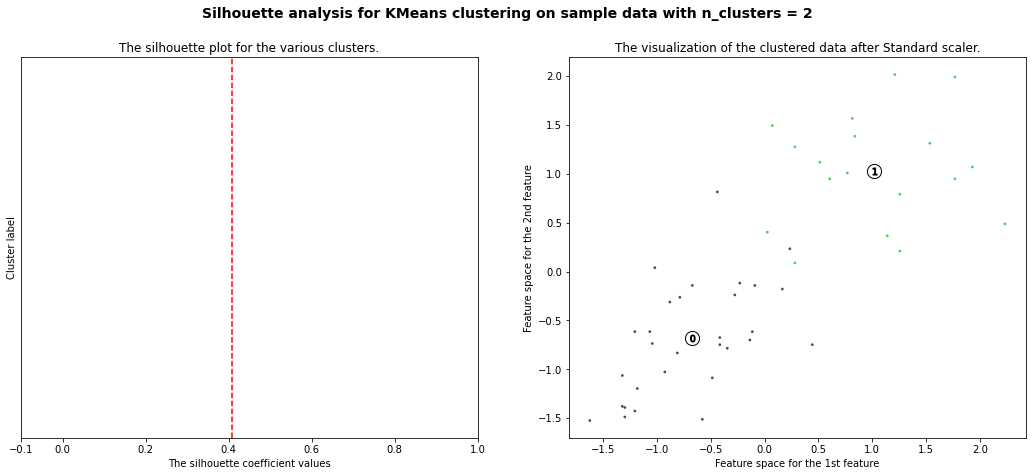

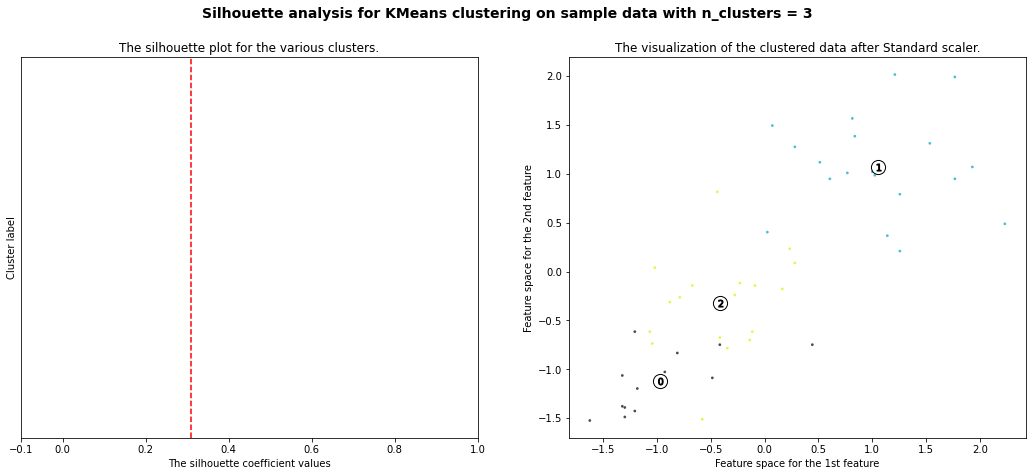

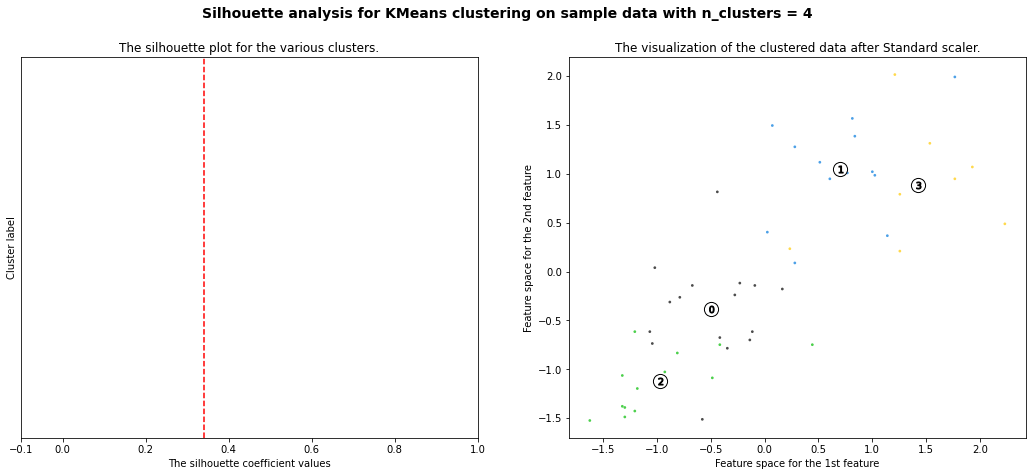

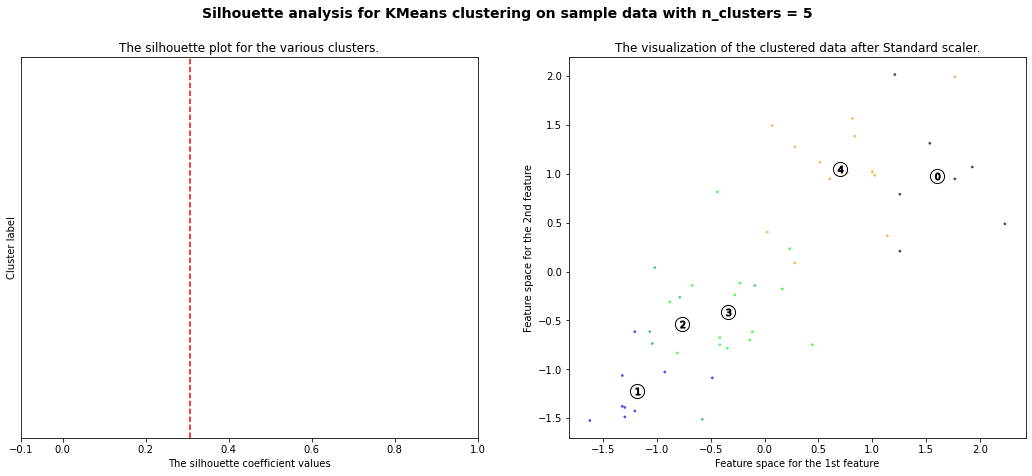

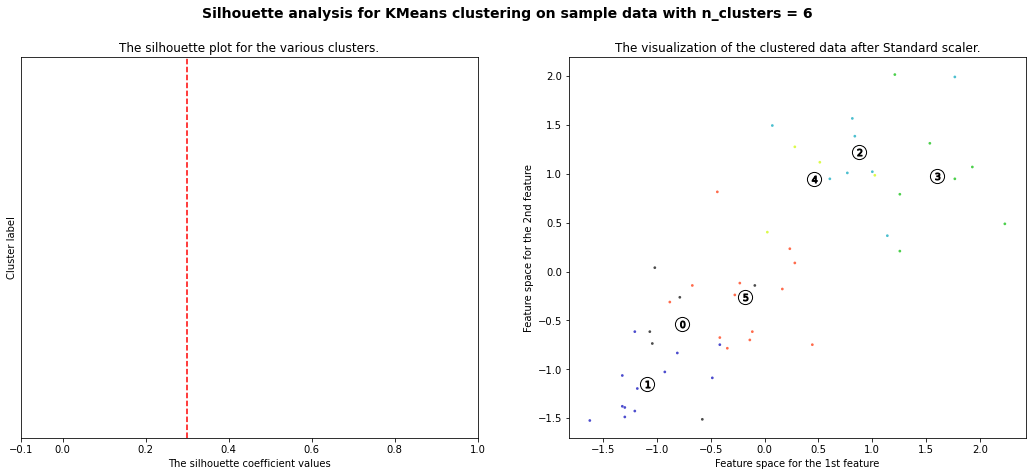

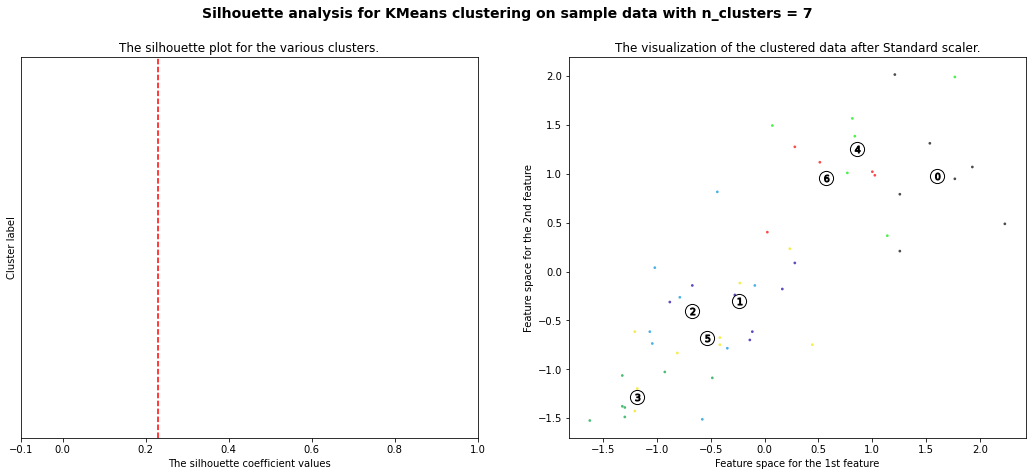

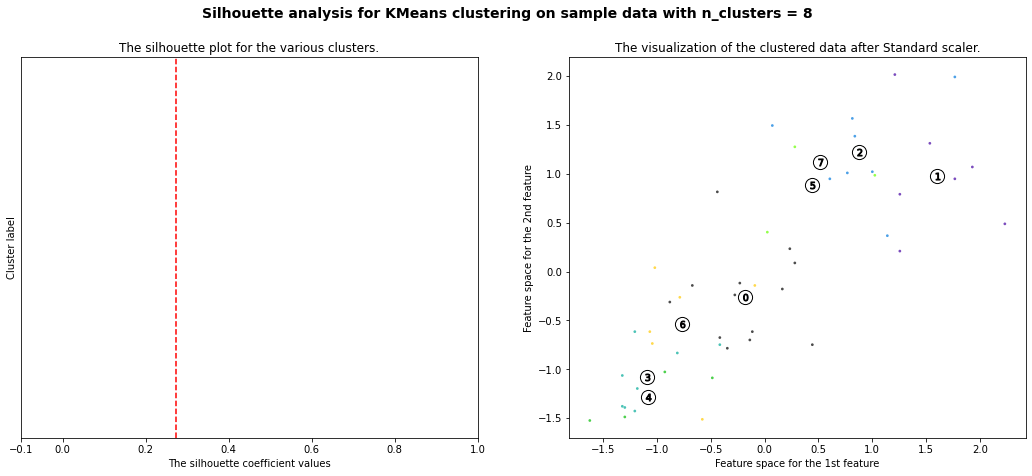

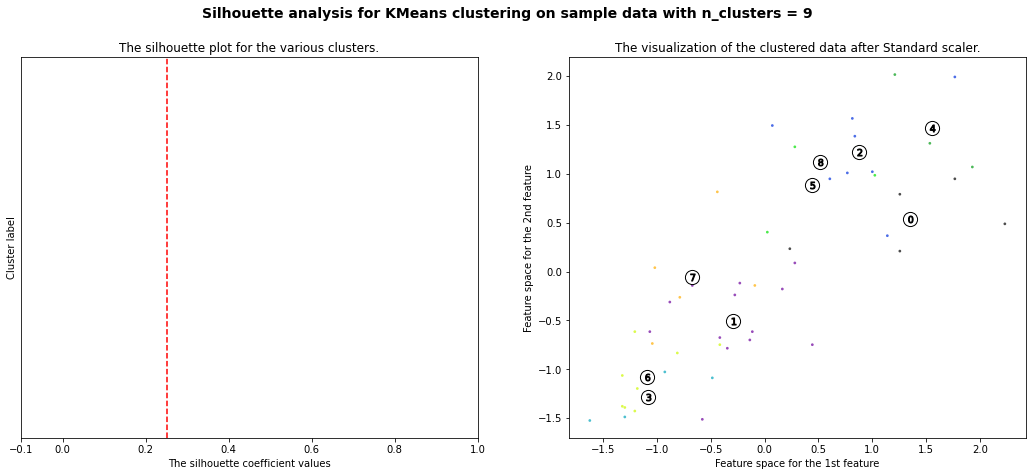

In [79]:
range_n_clusters = [2,3,4,5,6,7,8,9]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(std_df) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=0)
    cluster_labels = clusterer.fit_predict(std_df)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = sil(std_df, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(std_df, cluster_labels)
    range_n_clusters = [2,3,4,5,6,7,8,9]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(std_df) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=0)
    cluster_labels = clusterer.fit_predict(std_df)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = sil(std_df, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(std_df, cluster_labels)
    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(std_df[:,0], std_df[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:,0], centers[:,1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data after Standard scaler.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()


In [80]:
model_kmeans = KMeans(n_clusters=3, random_state=0, init='k-means++')
y_predict_kmeans = model_kmeans.fit_predict(std_df)
y_predict_kmeans.shape

(50,)

In [81]:
y_predict_kmeans

array([1, 1, 1, 2, 1, 1, 2, 2, 1, 1, 2, 0, 1, 2, 0, 2, 0, 1, 0, 1, 2, 1,
       0, 1, 2, 0, 0, 1, 0, 2, 1, 1, 1, 0, 2, 2, 2, 2, 2, 1, 0, 1, 1, 2,
       0, 2, 2, 0, 0, 2])

In [83]:
model_kmeans.labels_

array([1, 1, 1, 2, 1, 1, 2, 2, 1, 1, 2, 0, 1, 2, 0, 2, 0, 1, 0, 1, 2, 1,
       0, 1, 2, 0, 0, 1, 0, 2, 1, 1, 1, 0, 2, 2, 2, 2, 2, 1, 0, 1, 1, 2,
       0, 2, 2, 0, 0, 2])

In [85]:
model_kmeans.cluster_centers_

array([[-0.97130281, -1.11783581, -0.93954982, -0.97657842],
       [ 1.05377053,  1.07340253,  0.19371445,  0.86104144],
       [-0.41081687, -0.32571014,  0.4740874 , -0.20357044]])

In [86]:
model_kmeans.inertia_

80.08886132199619

In [87]:
model_kmeans.inertia_

80.08886132199619

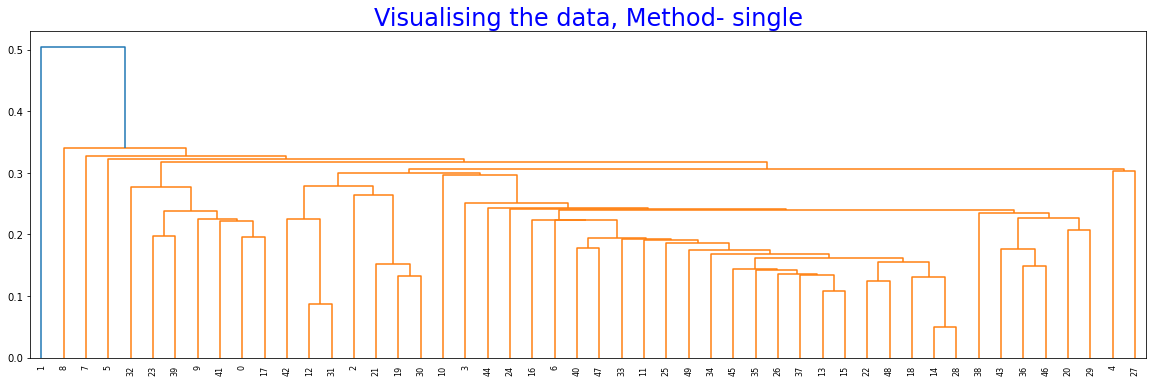

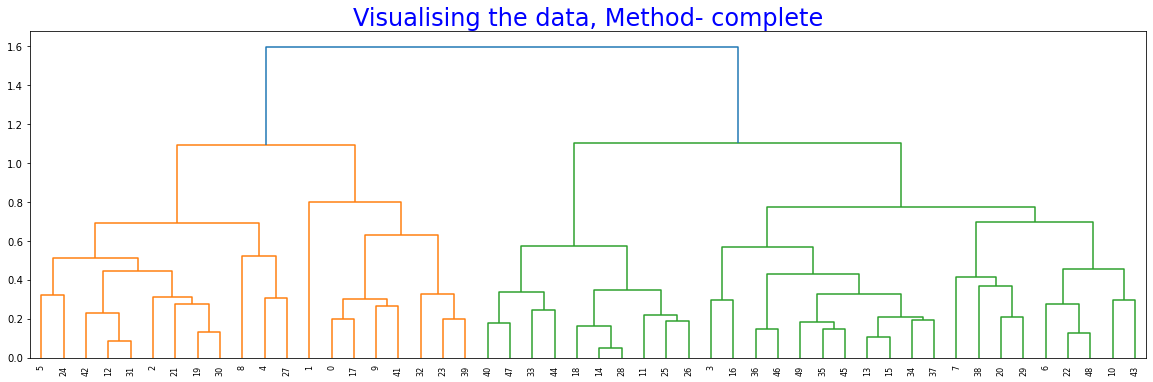

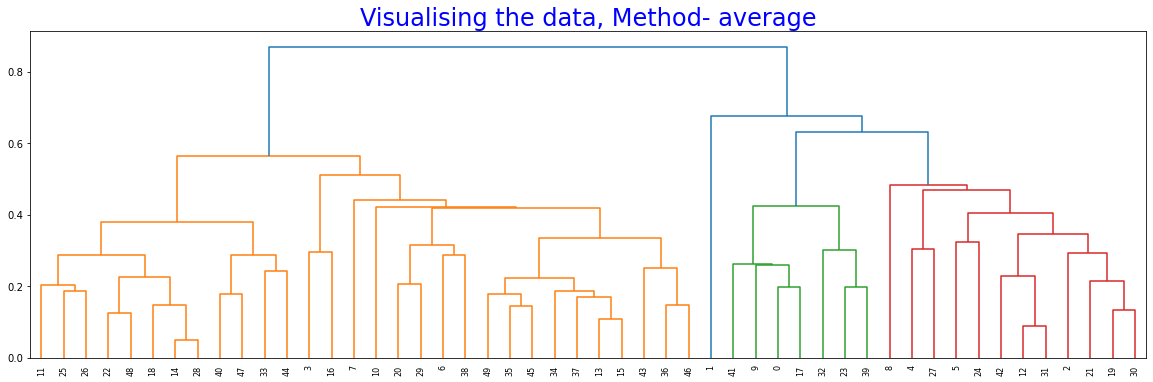

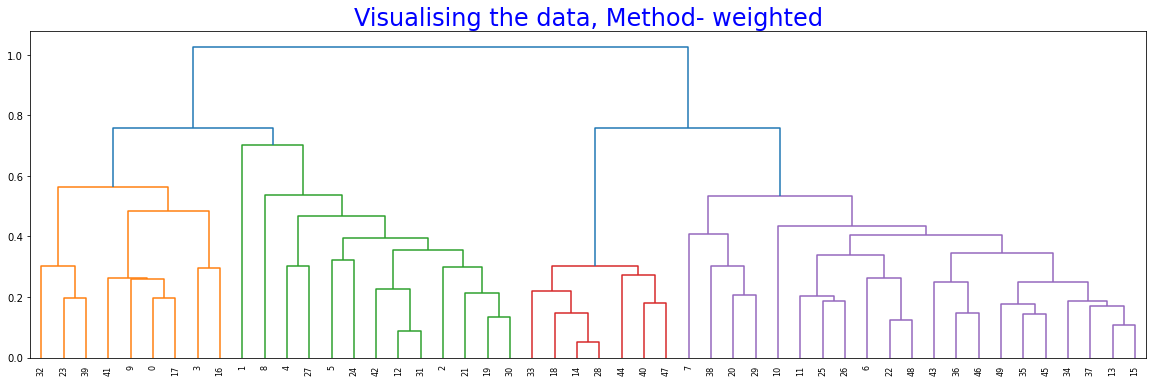

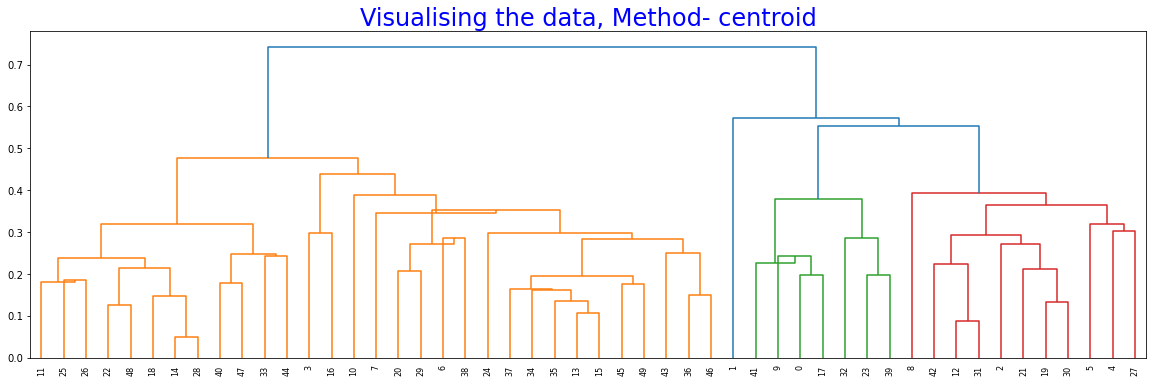

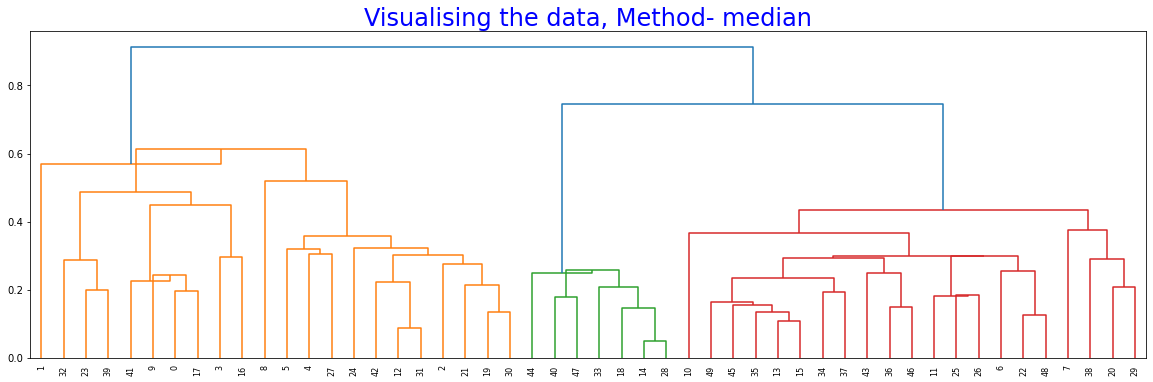

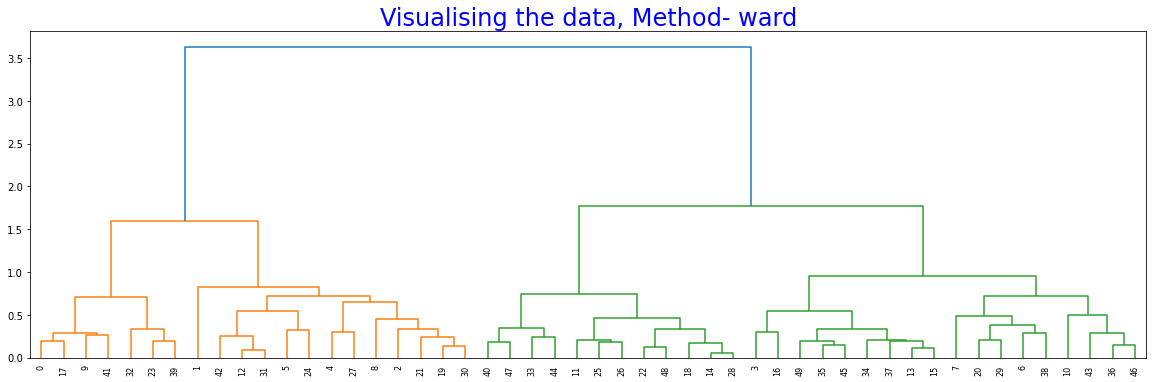

In [90]:
for methods in ['single','complete','average','weighted','centroid','median','ward']: 
    plt.figure(figsize =(20, 6)) 
    
    dict = {'fontsize':24,'fontweight' :16, 'color' : 'blue'}
    
    plt.title('Visualising the data, Method- {}'.format(methods),fontdict = dict) 
    Dendrogram1 = sch.dendrogram(sch.linkage(minmax_df, method = methods,optimal_ordering=False))

In [91]:
n_clusters = [2,3,4,5,6,7,8]  # always start number from 2.

for n_clusters in n_clusters:
    for linkages in ["ward", "complete", "average", "single"]:
        hie_cluster1 = AgglomerativeClustering(n_clusters=n_clusters,linkage=linkages) # bydefault it takes linkage 'ward'
        hie_labels1 = hie_cluster1.fit_predict(minmax_df)
        silhouette_score1 = sil(minmax_df, hie_labels1)
        print("For n_clusters =", n_clusters,"The average silhouette_score with linkage-",linkages, ':',silhouette_score1)
    print()

For n_clusters = 2 The average silhouette_score with linkage- ward : 0.42364457559625074
For n_clusters = 2 The average silhouette_score with linkage- complete : 0.42364457559625074
For n_clusters = 2 The average silhouette_score with linkage- average : 0.42364457559625074
For n_clusters = 2 The average silhouette_score with linkage- single : 0.21033337025958487

For n_clusters = 3 The average silhouette_score with linkage- ward : 0.31916915428121284
For n_clusters = 3 The average silhouette_score with linkage- complete : 0.30877213909512063
For n_clusters = 3 The average silhouette_score with linkage- average : 0.35149572430421583
For n_clusters = 3 The average silhouette_score with linkage- single : 0.14223288708185444

For n_clusters = 4 The average silhouette_score with linkage- ward : 0.3298707379986785
For n_clusters = 4 The average silhouette_score with linkage- complete : 0.3060729442426308
For n_clusters = 4 The average silhouette_score with linkage- average : 0.36992391140277

In [92]:
n_clusters = [2,3,4,5,6,7,8]  

for n_clusters in n_clusters:
    for linkages in ["ward", "complete", "average", "single"]:
        hie_cluster1 = AgglomerativeClustering(n_clusters=n_clusters,linkage=linkages) # bydefault it takes linkage 'ward'
        hie_labels1 = hie_cluster1.fit_predict(std_df)
        silhouette_score1 = sil(std_df, hie_labels1)
        print("For n_clusters =", n_clusters,"The average silhouette_score with linkage-",linkages, ':',silhouette_score1)
    print()


For n_clusters = 2 The average silhouette_score with linkage- ward : 0.4047944502519567
For n_clusters = 2 The average silhouette_score with linkage- complete : 0.4047944502519567
For n_clusters = 2 The average silhouette_score with linkage- average : 0.4084890326217641
For n_clusters = 2 The average silhouette_score with linkage- single : 0.23455598753159795

For n_clusters = 3 The average silhouette_score with linkage- ward : 0.31036358174027895
For n_clusters = 3 The average silhouette_score with linkage- complete : 0.36924314190439733
For n_clusters = 3 The average silhouette_score with linkage- average : 0.34863679190476177
For n_clusters = 3 The average silhouette_score with linkage- single : 0.14582343625170263

For n_clusters = 4 The average silhouette_score with linkage- ward : 0.3370187183556962
For n_clusters = 4 The average silhouette_score with linkage- complete : 0.31595507426164543
For n_clusters = 4 The average silhouette_score with linkage- average : 0.3636819420151221

In [93]:
agg_clustering = AgglomerativeClustering(n_clusters=2, linkage='ward')
y_pred_hie = agg_clustering.fit_predict(minmax_df)
print(y_pred_hie.shape)
y_pred_hie

(50,)


array([1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0], dtype=int64)

In [94]:
agg_clustering.n_clusters_

2

In [95]:
(sil(minmax_df, agg_clustering.labels_)*100).round(3)

42.364

In [96]:
df['Hierarchical_labels'] = agg_clustering.labels_

In [97]:
df.groupby('Hierarchical_labels').agg(['mean'])

,Murder,Assault,UrbanPop,Rape
,mean,mean,mean,mean
Hierarchical_labels,,,,
0,4.870,114.433333,63.633333,15.943333
1,12.165,255.250000,68.400000,29.165000


<AxesSubplot:xlabel='Hierarchical_labels', ylabel='Murder'>

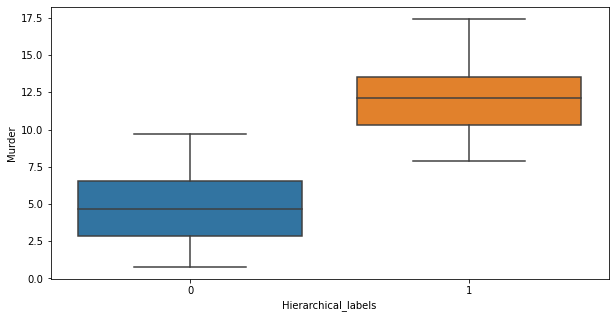

In [98]:
plt.figure(figsize=(10,5))
sns.boxplot(x='Hierarchical_labels', y='Murder', data=df)

<AxesSubplot:xlabel='Hierarchical_labels', ylabel='Assault'>

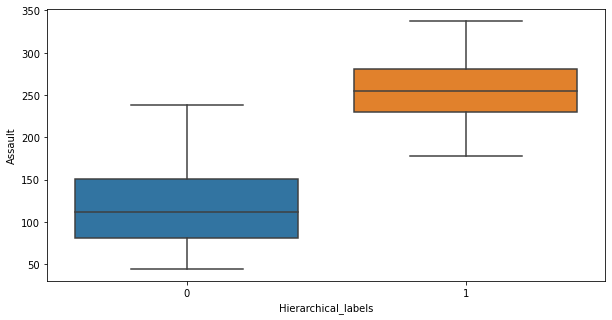

In [99]:
plt.figure(figsize=(10,5))
sns.boxplot(x='Hierarchical_labels', y='Assault', data=df)

<AxesSubplot:xlabel='Hierarchical_labels', ylabel='Rape'>

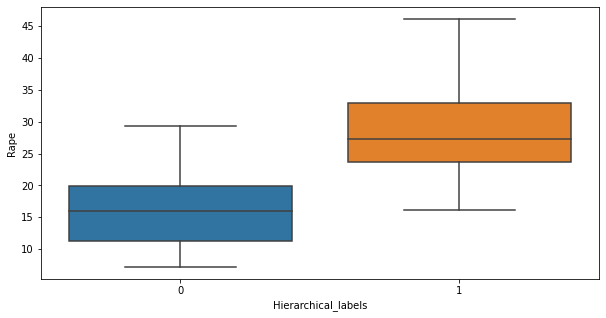

In [100]:
plt.figure(figsize=(10,5))
sns.boxplot(x='Hierarchical_labels', y='Rape', data=df)

In [101]:
from itertools import product

eps_values = np.arange(0.25,2,0.25) # eps values to be investigated
min_samples = np.arange(1,3)# min_samples values to be investigated
DBSCAN_params = list(product(eps_values, min_samples))

In [102]:
no_of_clusters = []
sil_score = []

for p in DBSCAN_params:
    DBS_clustering = DBSCAN(eps=p[0], min_samples=p[1]).fit(std_df)
    no_of_clusters.append(len(np.unique(DBS_clustering.labels_)))
    sil_score.append(sil(std_df, DBS_clustering.labels_))

A heatplot below shows how many clusters were genreated by the algorithm for the respective parameters combinations.


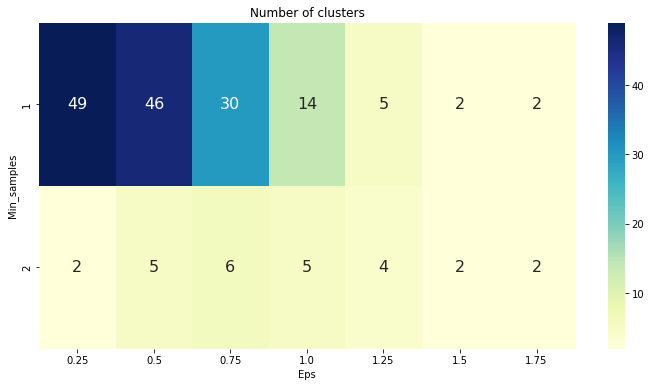

In [103]:
tmp = pd.DataFrame.from_records(DBSCAN_params, columns =['Eps', 'Min_samples'])   
tmp['No_of_clusters'] = no_of_clusters

pivot_1 = pd.pivot_table(tmp, values='No_of_clusters', index='Min_samples', columns='Eps')

fig, ax = plt.subplots(figsize=(12,6))
sns.heatmap(pivot_1, annot=True,annot_kws={"size": 16}, cmap="YlGnBu", ax=ax)
ax.set_title('Number of clusters')
print('A heatplot below shows how many clusters were genreated by the algorithm for the respective parameters combinations.')
plt.show()


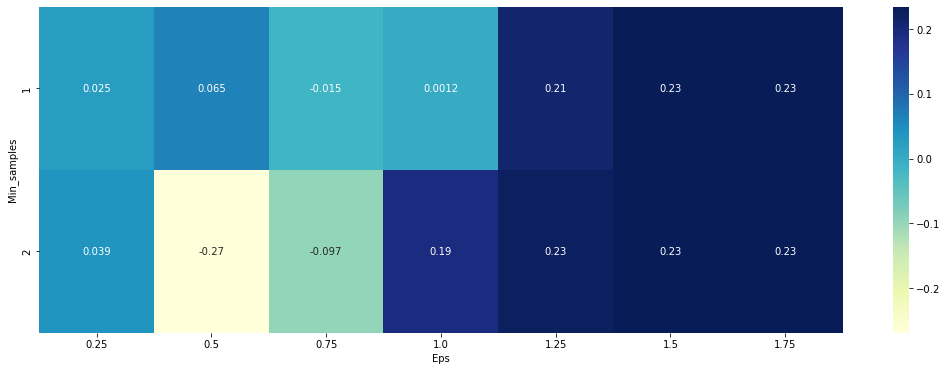

In [104]:
tmp = pd.DataFrame.from_records(DBSCAN_params, columns =['Eps', 'Min_samples'])   
tmp['Sil_score'] = sil_score

pivot_1 = pd.pivot_table(tmp, values='Sil_score', index='Min_samples', columns='Eps')

fig, ax = plt.subplots(figsize=(18,6))
sns.heatmap(pivot_1, annot=True, annot_kws={"size": 10}, cmap="YlGnBu", ax=ax)
plt.show()

In [105]:
epsilon = [0.25,0.50,0.75,1,1.25,1.50,1.75,2]
min_samples = [1,2]


sil_avg = []
max_value = [0,0,0,0]

for i in range(len(epsilon)):
    for j in range(len(min_samples)):

        db = DBSCAN(min_samples = min_samples[j], eps =epsilon[i]).fit(std_df)
        #cluster_labels=dbscan.fit_predict(data) 
        core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
        core_samples_mask[db.core_sample_indices_] = True
        labels = db.labels_

        # Number of clusters in labels, ignoring noise if present.
        n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
        n_noise_ = list(labels).count(-1)


        silhouette_avg = sil(std_df, labels)
        if silhouette_avg > max_value[3]:
            max_value=(epsilon[i], min_samples[j], n_clusters_, silhouette_avg)
        sil_avg.append(silhouette_avg)

print("epsilon=", max_value[0], 
      "\nmin_sample=", max_value[1],
      "\nnumber of clusters=", max_value[2],
      "\naverage silhouette score= %.4f" % max_value[3])

epsilon= 1.5 
min_sample= 1 
number of clusters= 2 
average silhouette score= 0.2346


In [106]:
dbscan = DBSCAN(eps=1.5, min_samples=1) # min_samples = number of columns  or len(dataset.columns)* 3
dbscan.fit(std_df)

DBSCAN(eps=1.5, min_samples=1)

In [107]:
dbscan.labels_

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0], dtype=int64)

In [108]:
df['DBSCAN_labels'] = dbscan.labels_
df.head()

,Murder,Assault,UrbanPop,Rape,Hierarchical_labels,DBSCAN_labels
States,,,,,,
Alabama,13.2,236,58,21.2,1,0
Alaska,10.0,263,48,44.5,1,1
Arizona,8.1,294,80,31.0,1,0
Arkansas,8.8,190,50,19.5,0,0
California,9.0,276,91,40.6,1,0


In [109]:
df.groupby('DBSCAN_labels').agg(['mean'])

,Murder,Assault,UrbanPop,Rape,Hierarchical_labels
,mean,mean,mean,mean,mean
DBSCAN_labels,,,,,
0,7.742857,168.877551,65.897959,20.757143,0.387755
1,10.000000,263.000000,48.000000,44.500000,1.000000


In [110]:
print("Silhouette Coefficient: %0.3f" % sil(std_df, dbscan.labels_))

Silhouette Coefficient: 0.235


In [111]:
from itertools import product

eps_values = np.arange(0.25,0.75,0.25)
min_samples = np.arange(1,3)
DBSCAN_params = list(product(eps_values, min_samples))

In [112]:
no_of_clusters = []
sil_score = []

for p in DBSCAN_params:
    DBS_clustering = DBSCAN(eps=p[0], min_samples=p[1]).fit(minmax_df)
    no_of_clusters.append(len(np.unique(DBS_clustering.labels_)))
    sil_score.append(sil(minmax_df, DBS_clustering.labels_))

A heatplot below shows how many clusters were genreated by the algorithm for the respective parameters combinations.


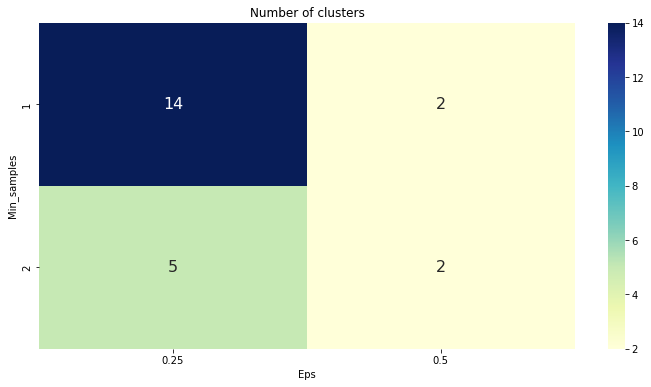

In [113]:
tmp = pd.DataFrame.from_records(DBSCAN_params, columns =['Eps', 'Min_samples'])   
tmp['No_of_clusters'] = no_of_clusters

pivot_1 = pd.pivot_table(tmp, values='No_of_clusters', index='Min_samples', columns='Eps')

fig, ax = plt.subplots(figsize=(12,6))
sns.heatmap(pivot_1, annot=True,annot_kws={"size": 16}, cmap="YlGnBu", ax=ax)
ax.set_title('Number of clusters')
print('A heatplot below shows how many clusters were genreated by the algorithm for the respective parameters combinations.')
plt.show()

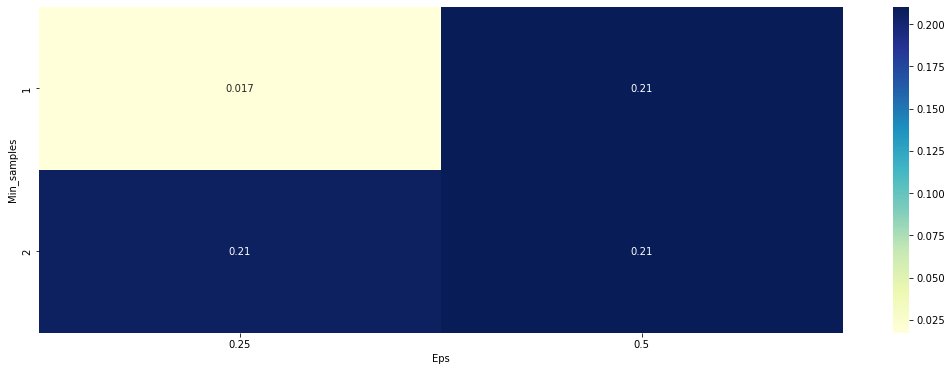

In [114]:
tmp = pd.DataFrame.from_records(DBSCAN_params, columns =['Eps', 'Min_samples'])   
tmp['Sil_score'] = sil_score

pivot_1 = pd.pivot_table(tmp, values='Sil_score', index='Min_samples', columns='Eps')

fig, ax = plt.subplots(figsize=(18,6))
sns.heatmap(pivot_1, annot=True, annot_kws={"size": 10}, cmap="YlGnBu", ax=ax)
plt.show()

In [115]:
epsilon = [0.25,0.5]
min_samples = [1,2]


sil_avg = []
max_value = [0,0,0,0]

for i in range(len(epsilon)):
    for j in range(len(min_samples)):

        db = DBSCAN(min_samples = min_samples[j], eps =epsilon[i]).fit(minmax_df)
        #cluster_labels=dbscan.fit_predict(data) 
        core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
        core_samples_mask[db.core_sample_indices_] = True
        labels = db.labels_

        # Number of clusters in labels, ignoring noise if present.
        n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
        n_noise_ = list(labels).count(-1)


        silhouette_avg = sil(minmax_df, labels)
        if silhouette_avg > max_value[3]:
            max_value=(epsilon[i], min_samples[j], n_clusters_, silhouette_avg)
        sil_avg.append(silhouette_avg)

print("epsilon=", max_value[0], 
      "\nmin_sample=", max_value[1],
      "\nnumber of clusters=", max_value[2],
      "\naverage silhouette score= %.4f" % max_value[3])

epsilon= 0.5 
min_sample= 1 
number of clusters= 2 
average silhouette score= 0.2103


In [116]:
dbscan = DBSCAN(eps=0.5, min_samples=1) # min_samples = number of clumns * 3
dbscan.fit(minmax_df)

DBSCAN(min_samples=1)

In [117]:
dbscan.labels_

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0], dtype=int64)

In [118]:
df['DBSCAN_labels'] = dbscan.labels_
df.head()

,Murder,Assault,UrbanPop,Rape,Hierarchical_labels,DBSCAN_labels
States,,,,,,
Alabama,13.2,236,58,21.2,1,0
Alaska,10.0,263,48,44.5,1,1
Arizona,8.1,294,80,31.0,1,0
Arkansas,8.8,190,50,19.5,0,0
California,9.0,276,91,40.6,1,0


In [119]:
df.groupby('DBSCAN_labels').agg(['mean'])

,Murder,Assault,UrbanPop,Rape,Hierarchical_labels
,mean,mean,mean,mean,mean
DBSCAN_labels,,,,,
0,7.742857,168.877551,65.897959,20.757143,0.387755
1,10.000000,263.000000,48.000000,44.500000,1.000000


In [120]:
cluster1 = pd.DataFrame(df.loc[df.DBSCAN_labels==0].mean(),columns= ['Cluster1_avg'])
cluster2 = pd.DataFrame(df.loc[df.DBSCAN_labels==1].mean(),columns= ['Cluster2_avg'])

In [121]:
avg_df = pd.concat([cluster1,cluster2],axis=1)
avg_df

,Cluster1_avg,Cluster2_avg
Murder,7.742857,10.0
Assault,168.877551,263.0
UrbanPop,65.897959,48.0
Rape,20.757143,44.5
Hierarchical_labels,0.387755,1.0
DBSCAN_labels,0.000000,1.0


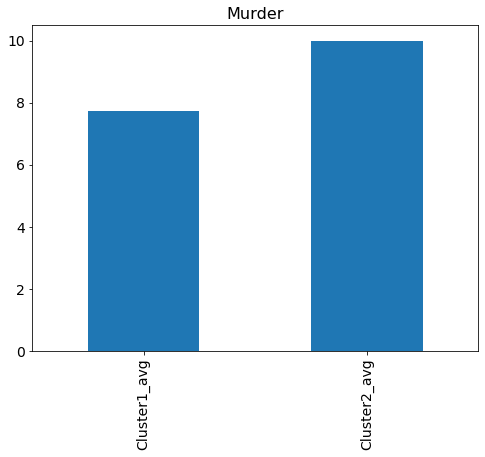

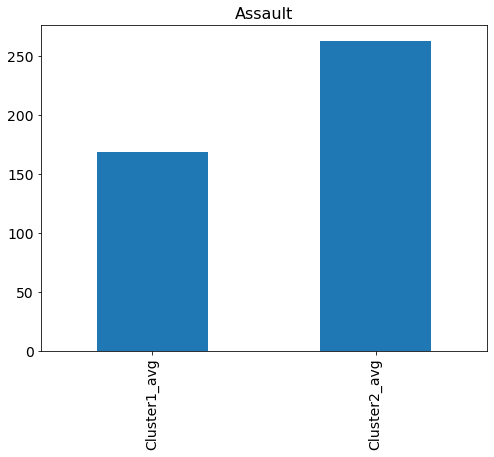

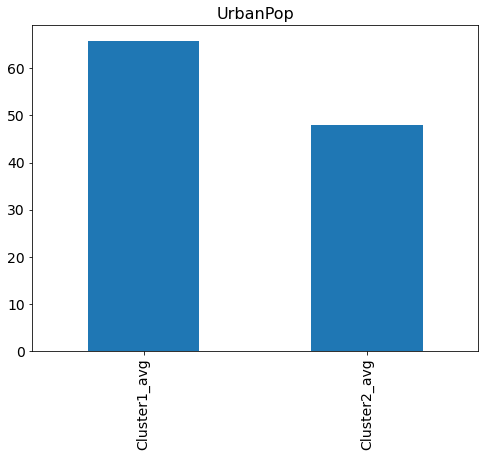

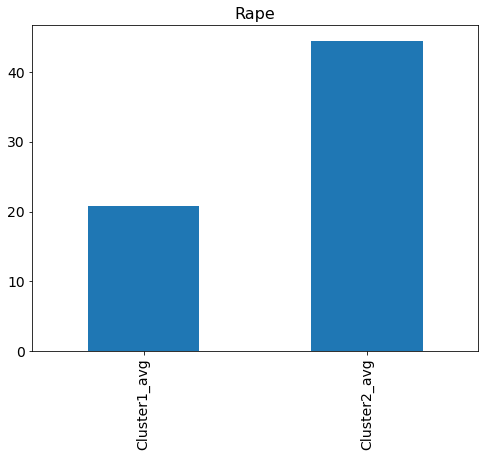

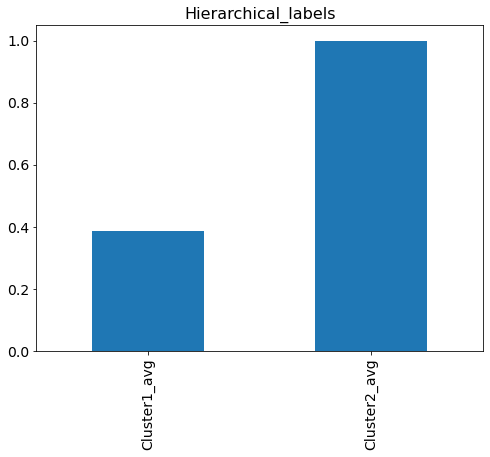

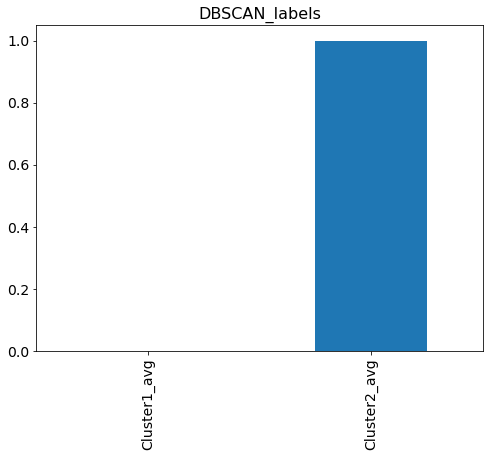

In [122]:
for i , row in avg_df.iterrows():
    fig = plt.subplots(figsize=(8,6))
    j = avg_df.xs(i ,axis = 0)
    plt.title(i, fontsize=16, fontweight=20)
    j.plot(kind='bar',fontsize=14)
    plt.show()
    print()